In [1]:
import os
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt
import seedir as sd
import zipfile

In [2]:
def plot_nii(path):
    img = nib.load(path)
    plotting.plot_img(img, display_mode='mosaic', cmap='gray')
    plt.show()

In [3]:
ukbb_img_dir = r"Z:\data\ukb\imaging"

# imaging\t1_preprocessed

only 7 files under this folder

(ignore this section)

In [4]:
# "Z:\data\ukb\imaging\t1_preprocessed"
t1_pre_dir = os.path.join(ukbb_img_dir, "t1_preprocessed") 

# print all the files inside
sd.seedir(t1_pre_dir)

t1_preprocessed/
├─6014205.nii
├─6014864.nii
├─6017768.nii
├─6020445.nii
├─6022025.nii
├─6023598.nii
└─6026401.nii


## Take a look at one sample

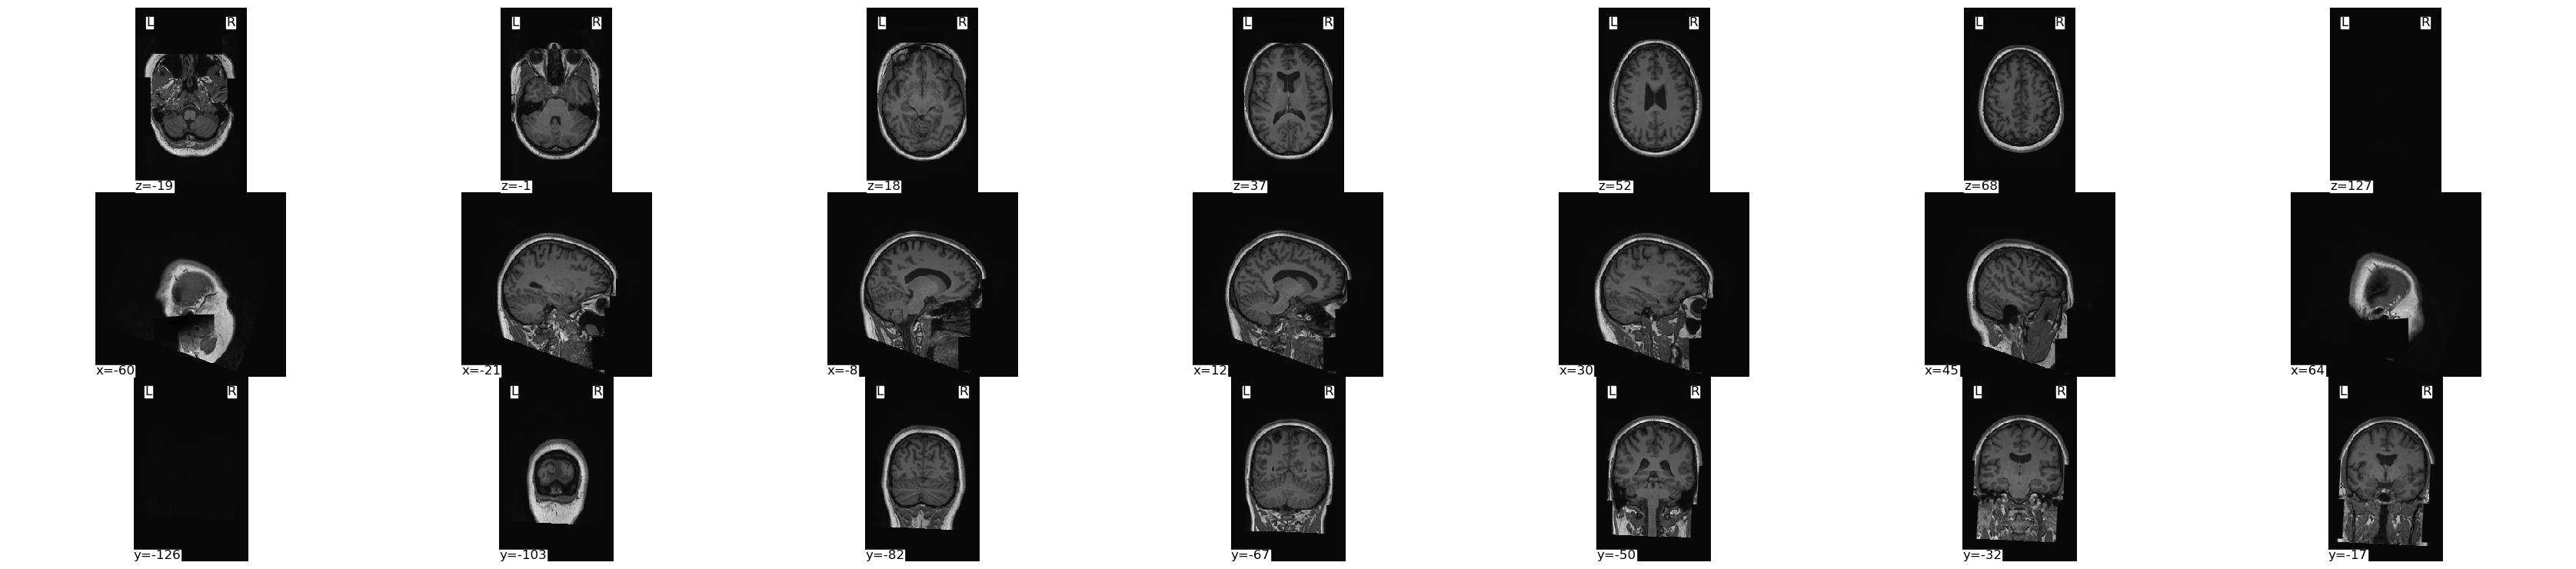

In [5]:
t1_pre_0_path = os.path.join(t1_pre_dir, "6014205.nii")
plot_nii(t1_pre_0_path)

# imaging\raw\t1_structural_nifti_20252
about 40,600 files under this folder

In [6]:
# "Z:\data\ukb\imaging\raw\t1_structural_nifti_20252"
raw_dir = os.path.join(ukbb_img_dir, "raw")
raw_t1_stru_dir = os.path.join(raw_dir, "t1_structural_nifti_20252")

# print 10 files inside
sd.seedir(raw_t1_stru_dir, itemlimit=10)

t1_structural_nifti_20252/
├─5024977_20252_2_0.zip
├─5106008_20252_2_0.zip
├─3165242_20252_2_0.zip
├─5932644_20252_2_0.zip
├─4197107_20252_2_0.zip
├─5162329_20252_2_0.zip
├─3088154_20252_2_0.zip
├─3343224_20252_2_0.zip
├─2421432_20252_2_0.zip
└─4080062_20252_2_0.zip


## Take a look at one sample
a zip file contains many diff scans

In [28]:
sample_id = "1000145_20252_2_0"
raw_t1_stru_0_path = os.path.join(raw_t1_stru_dir, sample_id + ".zip")

# have a peek the file structure inside one zipped sample
with zipfile.ZipFile(raw_t1_stru_0_path, 'r') as archive:
    # print all the files in side the sampleb
    archive.printdir()

File Name                                             Modified             Size
T1/T1.json                                     2018-05-17 15:59:56          313
T1/T1_orig_defaced.nii.gz                      2018-05-23 00:48:26     16523289
T1/T1.nii.gz                                   2018-05-23 00:48:36     11989893
T1/T1_brain_mask.nii.gz                        2018-05-23 00:48:12       471450
T1/T1_brain.nii.gz                             2018-05-23 00:48:12      3247672
T1/T1_brain_to_MNI.nii.gz                      2018-05-23 00:48:14      3770492
T1/T1_unbiased_brain.nii.gz                    2018-05-23 01:00:18      5538668
T1/transforms/T1_to_MNI_linear.mat             2018-05-23 00:12:50          193
T1/transforms/T1_to_MNI_warp_coef.nii.gz       2018-05-23 00:46:36       118675
T1/T1_fast/T1_brain_seg.nii.gz                 2018-05-23 01:00:04       346533
T1/T1_fast/T1_brain_pve_0.nii.gz               2018-05-23 01:00:04       761471
T1/T1_fast/T1_brain_pve_1.nii.gz        

### Extract .nii files

In [48]:
extract_dir = os.path.join("./temp/data/", sample_id)
os.makedirs(extract_dir, exist_ok=True)

nii_files = []

with zipfile.ZipFile(raw_t1_stru_0_path, 'r') as archive:
    for filename in archive.namelist():
        if filename.endswith(".nii") or filename.endswith(".nii.gz"):
            print(filename)
            archive.extract(member=filename, path=extract_dir)
            nii_files.append(filename)

print("------------------")
print(f"Finish extracting {len(nii_files)} .nii.gz files from the sample {raw_t1_stru_0_path}")

T1/T1_orig_defaced.nii.gz
T1/T1.nii.gz
T1/T1_brain_mask.nii.gz
T1/T1_brain.nii.gz
T1/T1_brain_to_MNI.nii.gz
T1/T1_unbiased_brain.nii.gz
T1/transforms/T1_to_MNI_warp_coef.nii.gz
T1/T1_fast/T1_brain_seg.nii.gz
T1/T1_fast/T1_brain_pve_0.nii.gz
T1/T1_fast/T1_brain_pve_1.nii.gz
T1/T1_fast/T1_brain_pve_2.nii.gz
T1/T1_fast/T1_brain_bias.nii.gz
T1/T1_first/T1_first_all_fast_firstseg.nii.gz
------------------
Finish extracting 13 .nii.gz files from the sample Z:\data\ukb\imaging\raw\t1_structural_nifti_20252\1000145_20252_2_0.zip


### Plot the .nii files


 -------------------------------------------------
0   T1/T1_orig_defaced.nii.gz


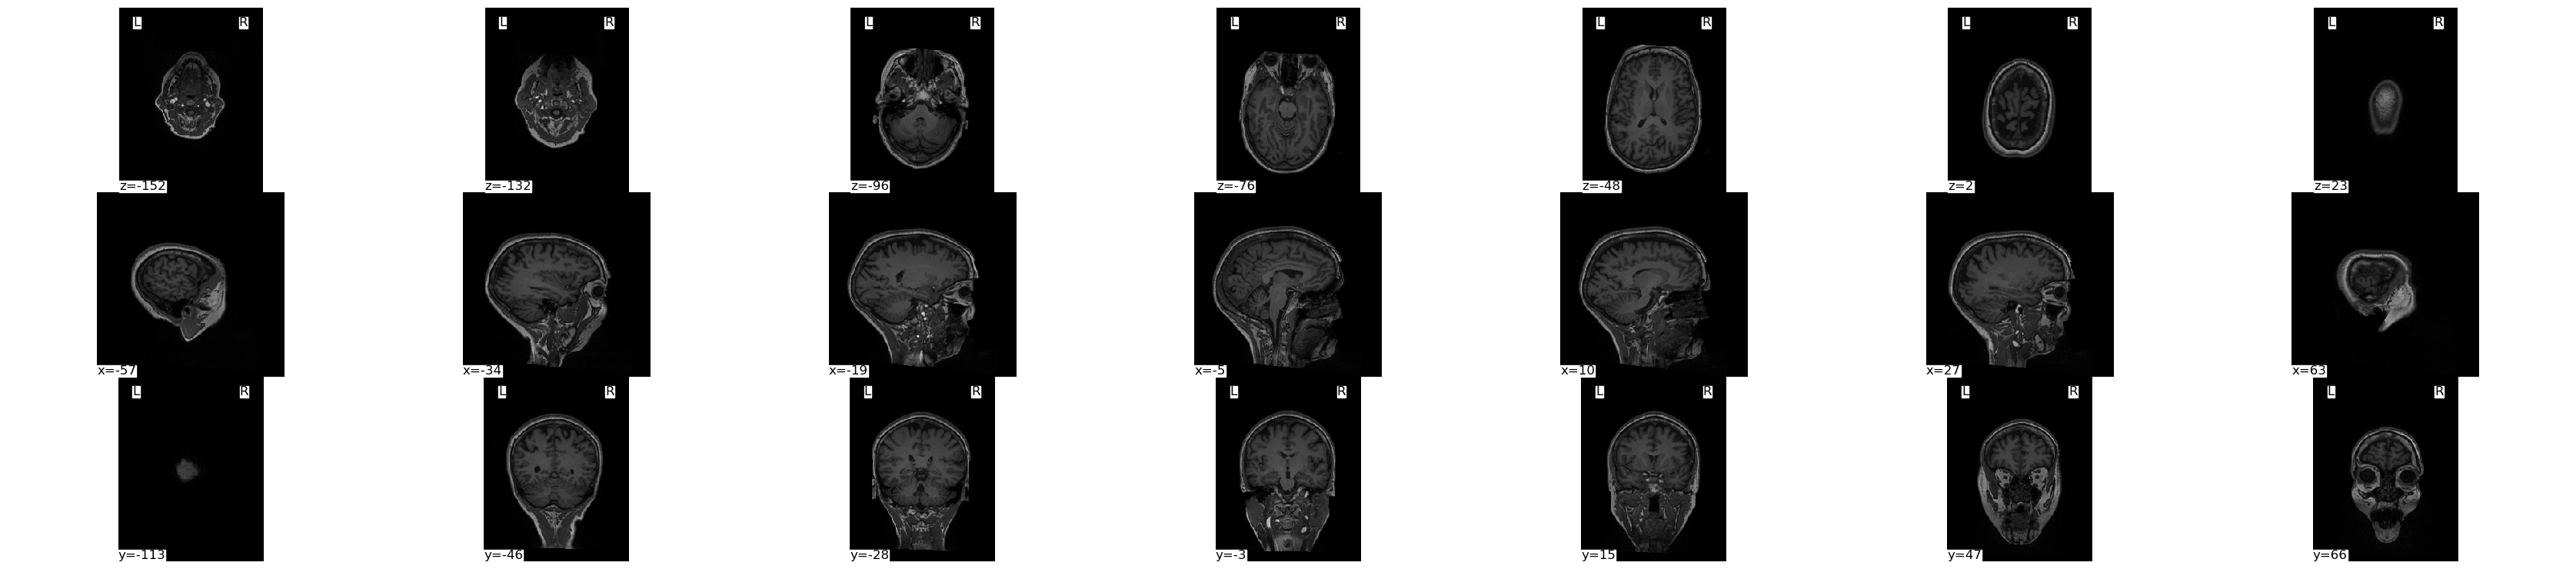


 -------------------------------------------------
1   T1/T1.nii.gz


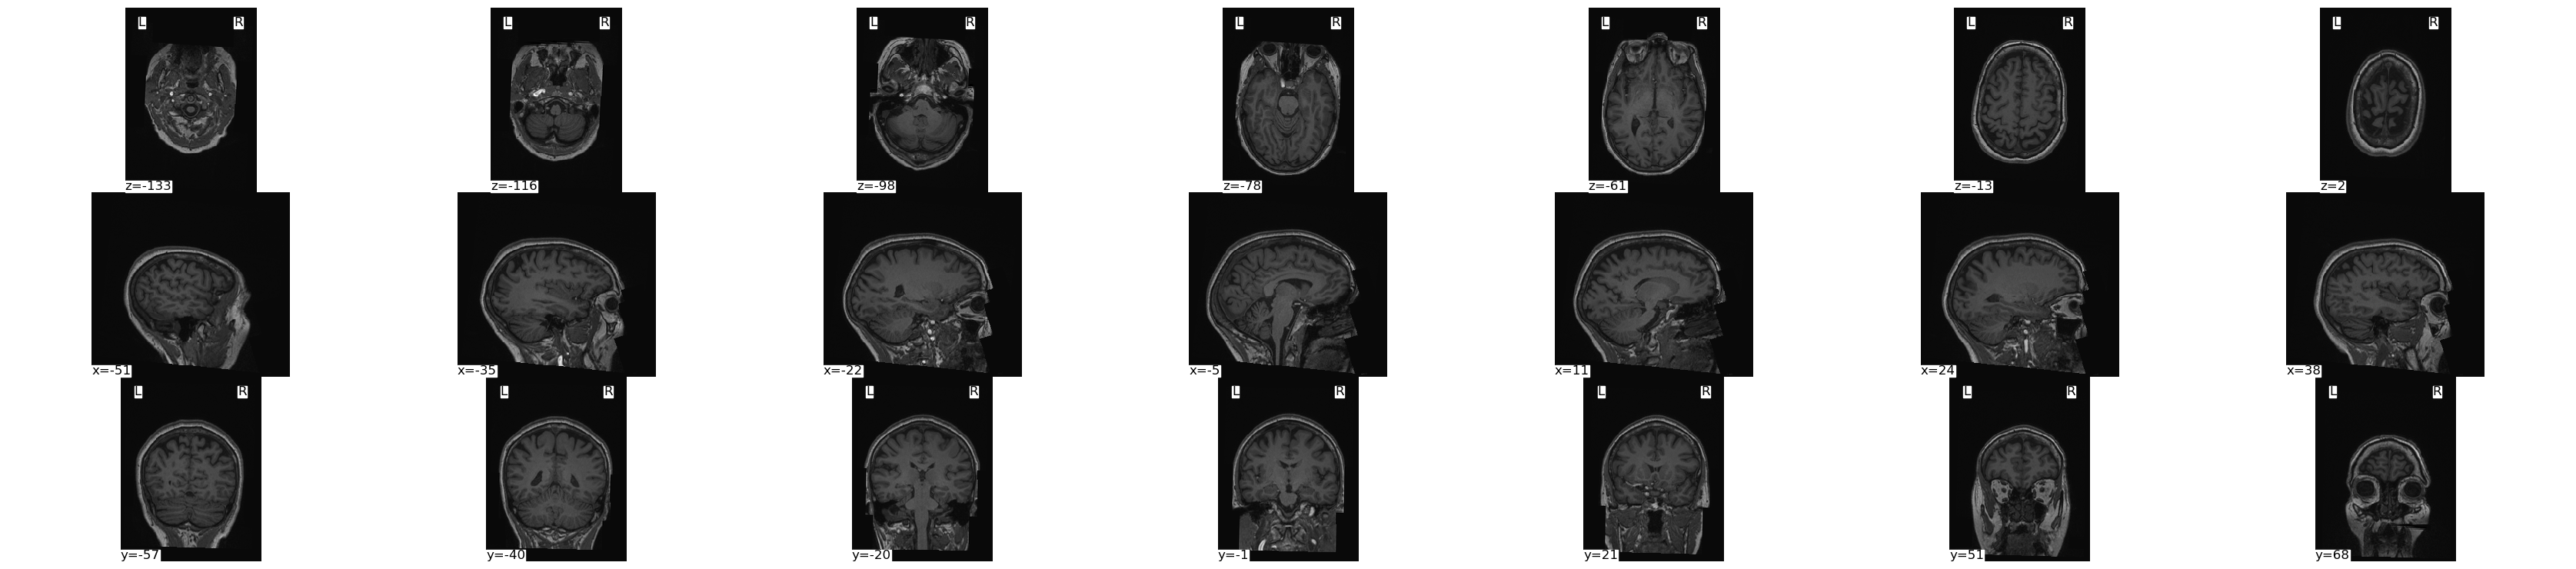


 -------------------------------------------------
2   T1/T1_brain_mask.nii.gz


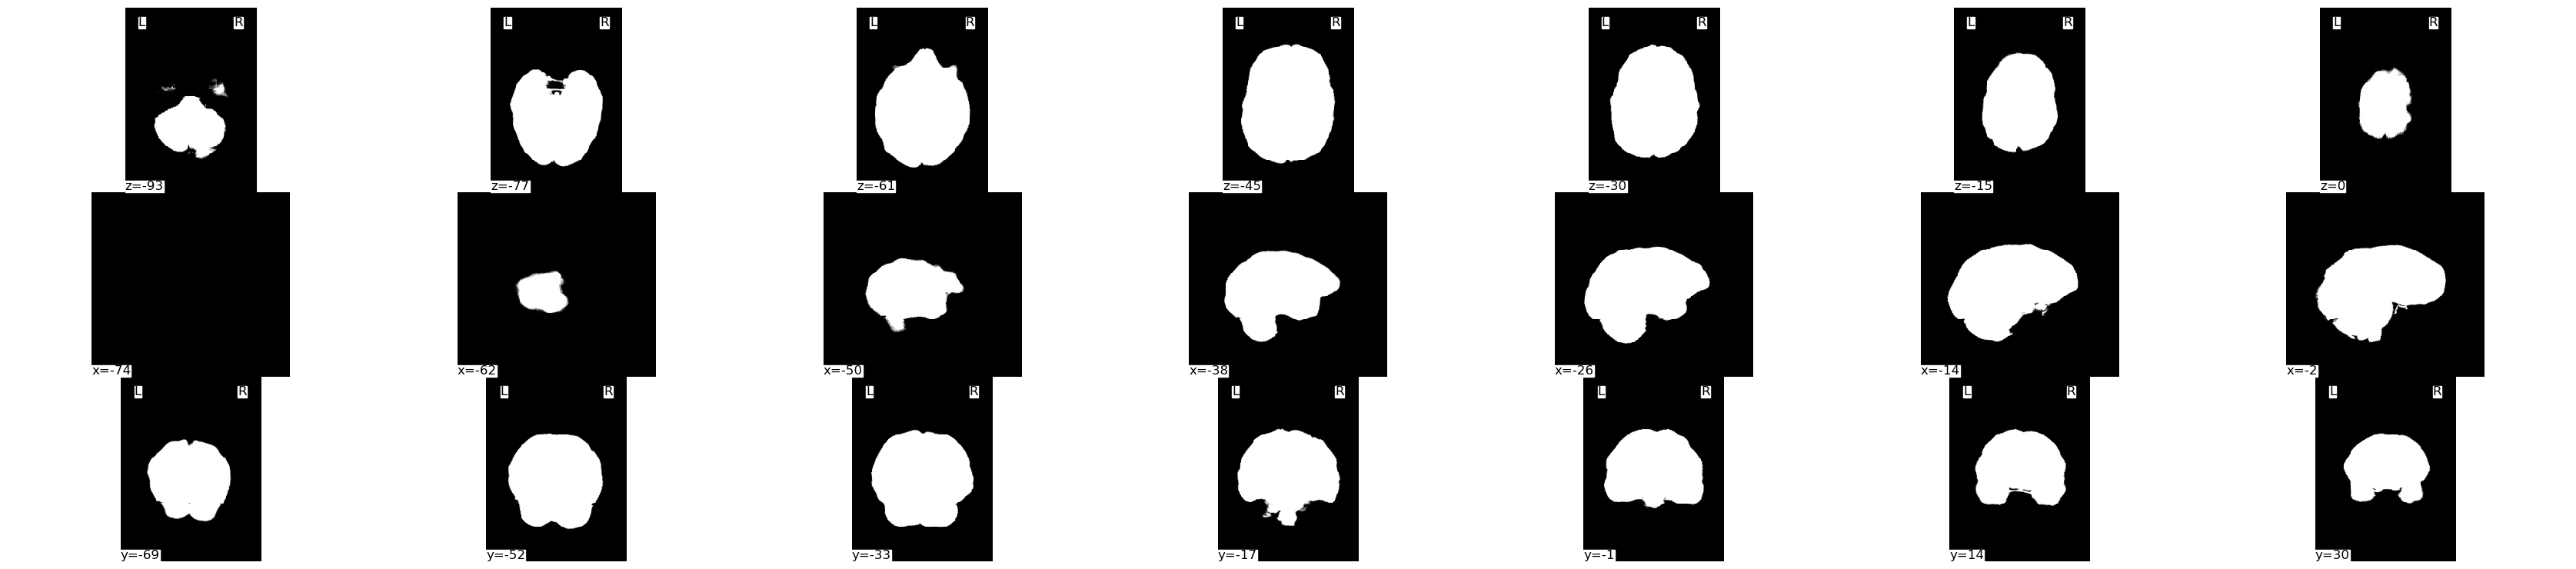


 -------------------------------------------------
3   T1/T1_brain.nii.gz


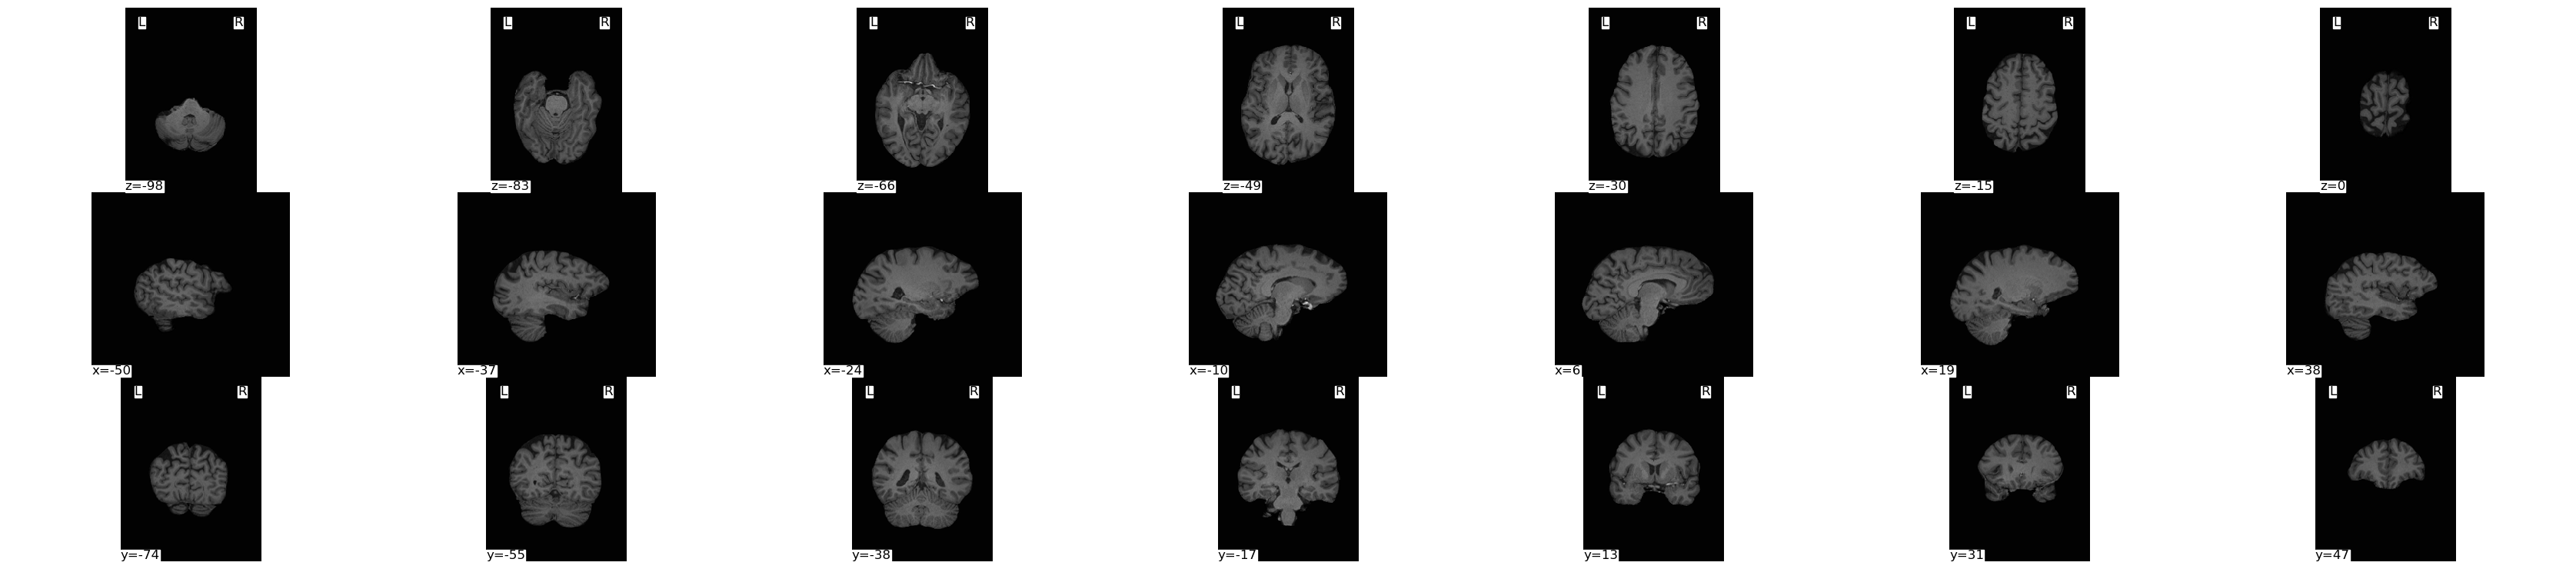


 -------------------------------------------------
4   T1/T1_brain_to_MNI.nii.gz


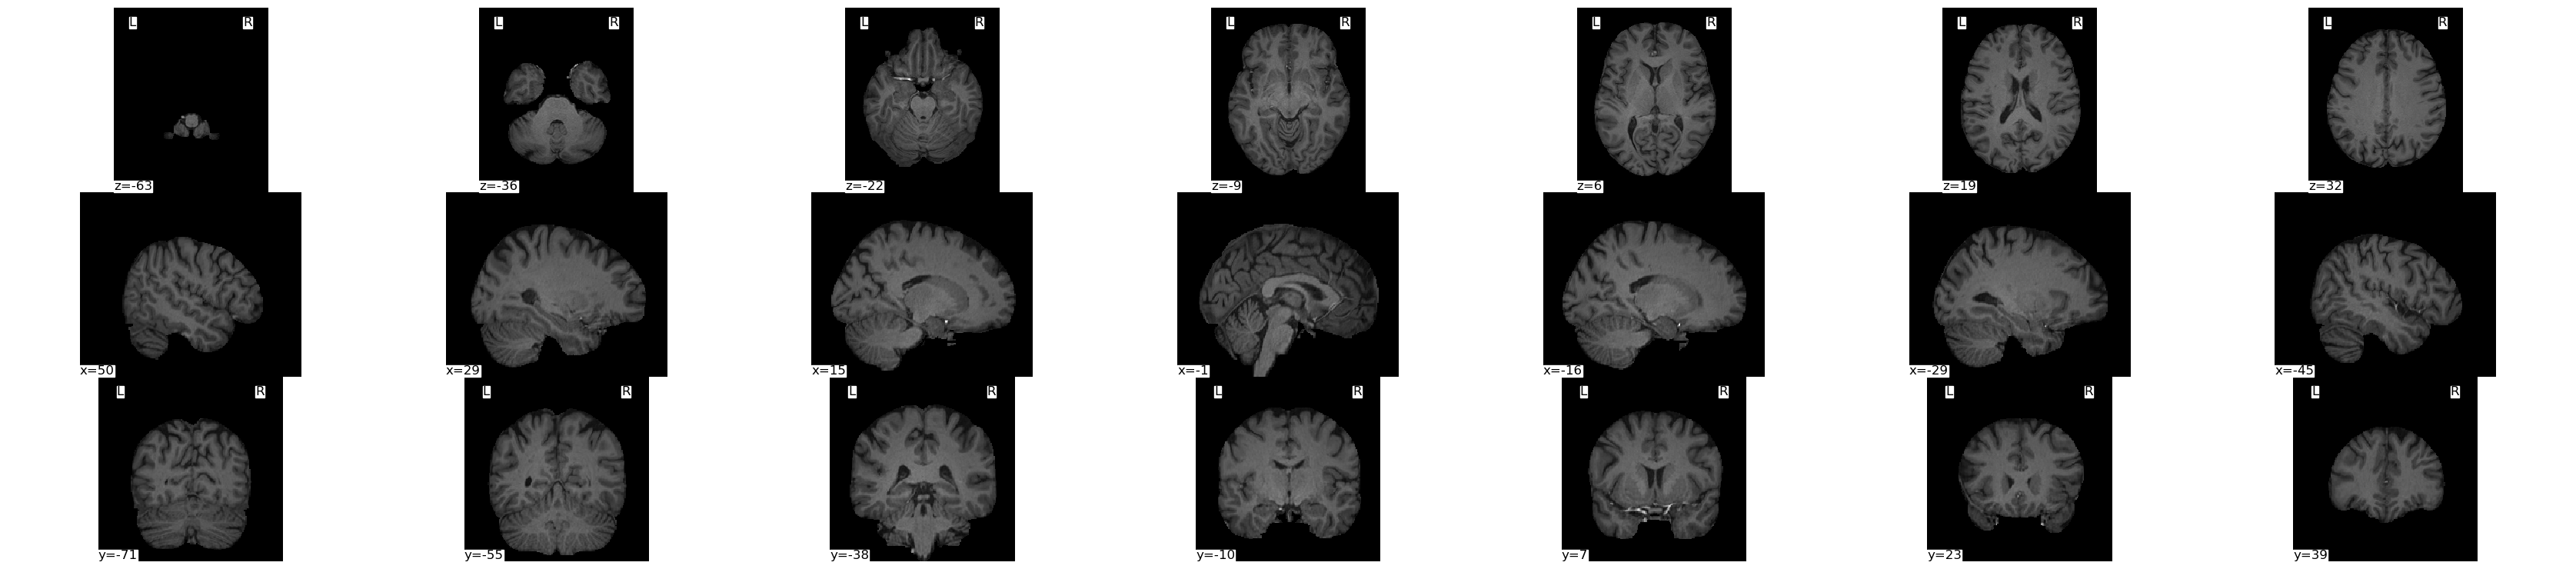


 -------------------------------------------------
5   T1/T1_unbiased_brain.nii.gz


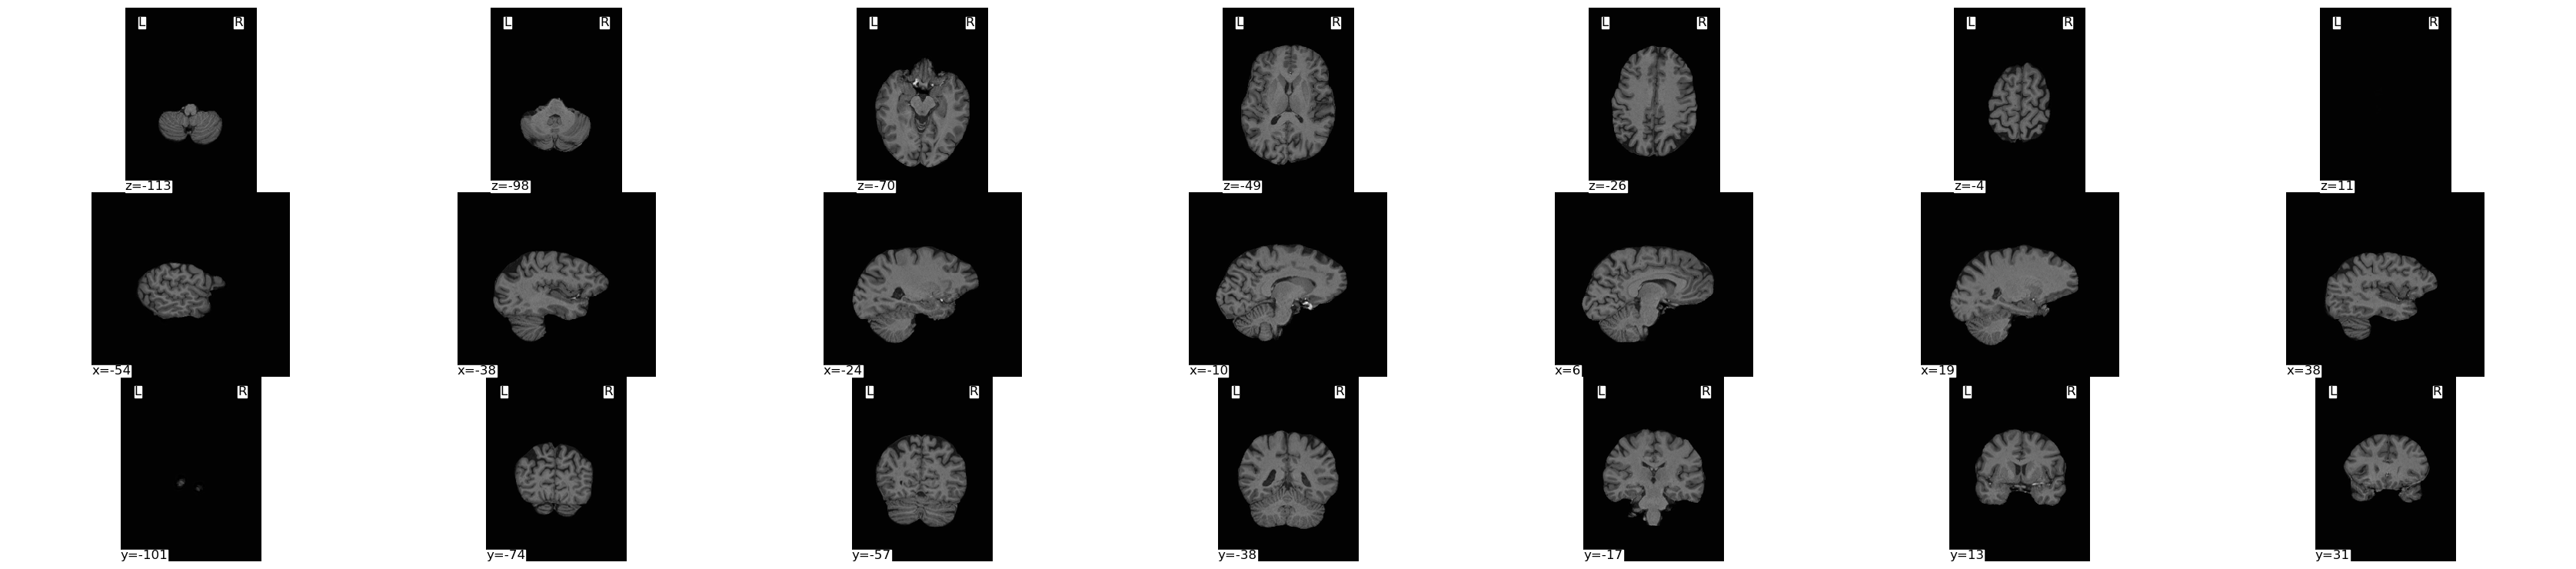


 -------------------------------------------------
6   T1/transforms/T1_to_MNI_warp_coef.nii.gz
Error: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 4D image. See https://nilearn.github.io/stable/manipulating_images/input_output.html.

 -------------------------------------------------
7   T1/T1_fast/T1_brain_seg.nii.gz


D:\miniconda3\envs\ConGele\lib\site-packages\nilearn\image\resampling.py:597: UserWarning: Casting data from int32 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")


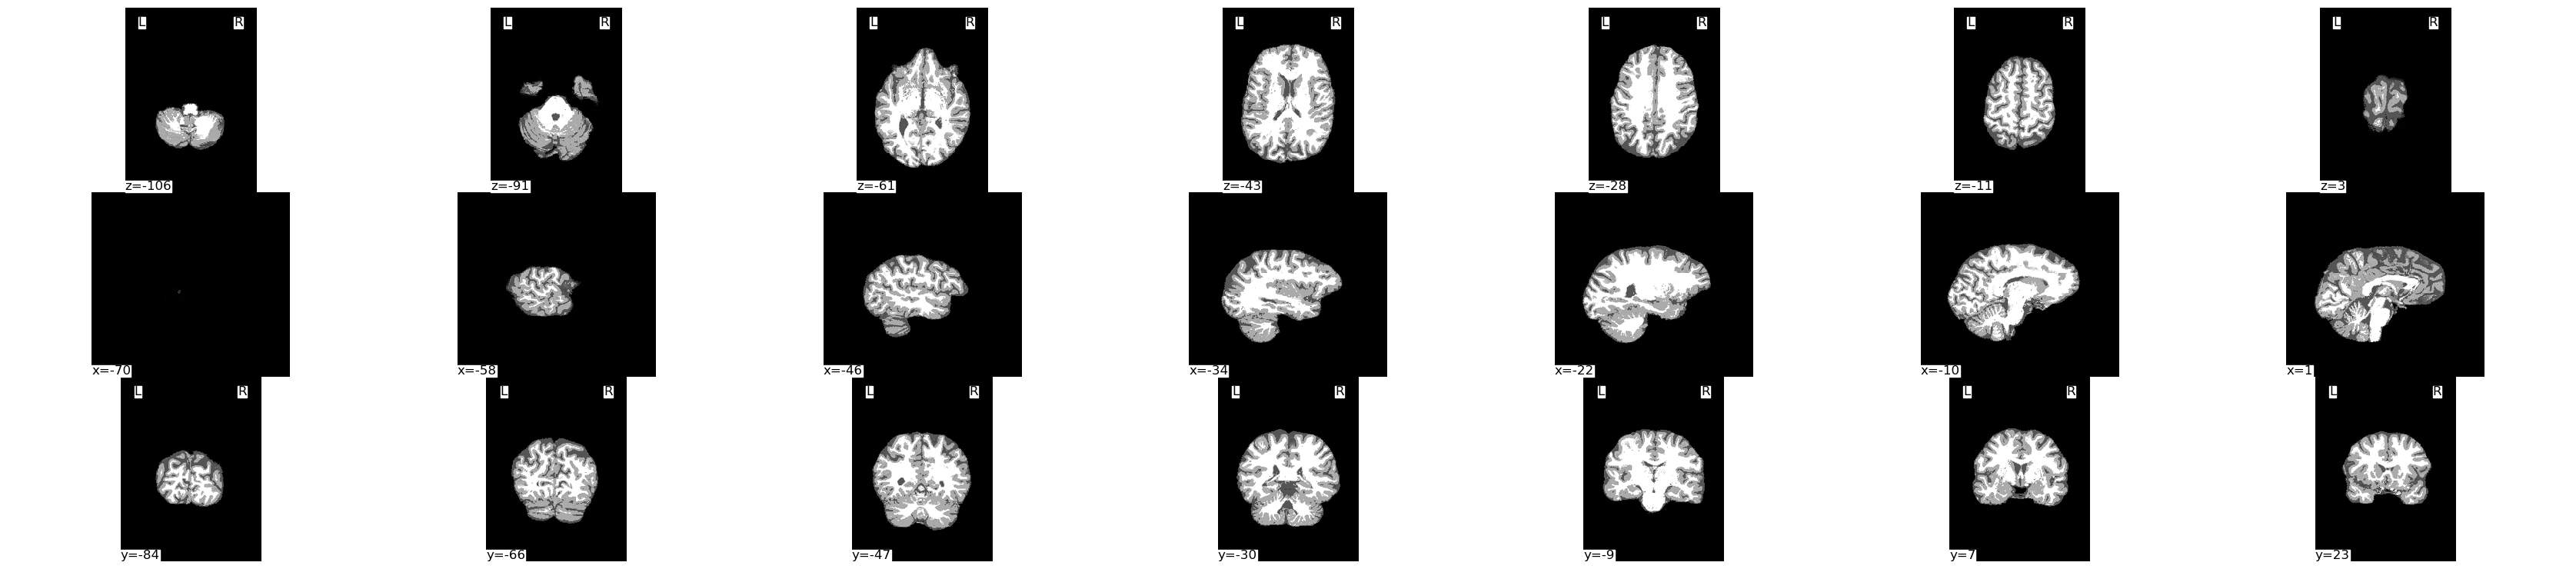


 -------------------------------------------------
8   T1/T1_fast/T1_brain_pve_0.nii.gz


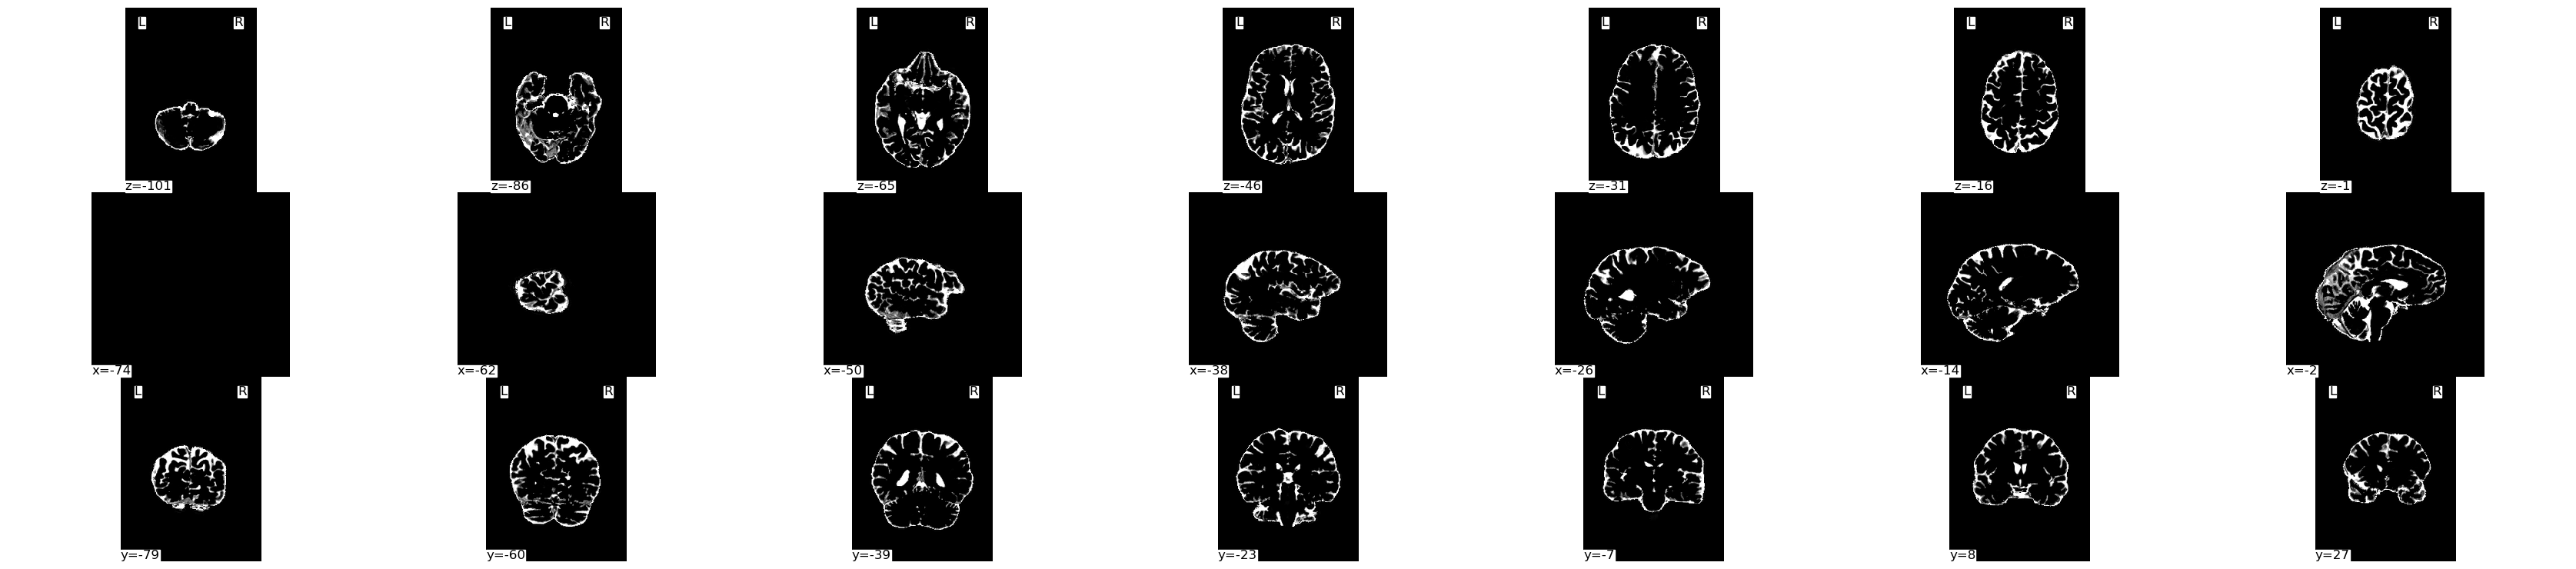


 -------------------------------------------------
9   T1/T1_fast/T1_brain_pve_1.nii.gz


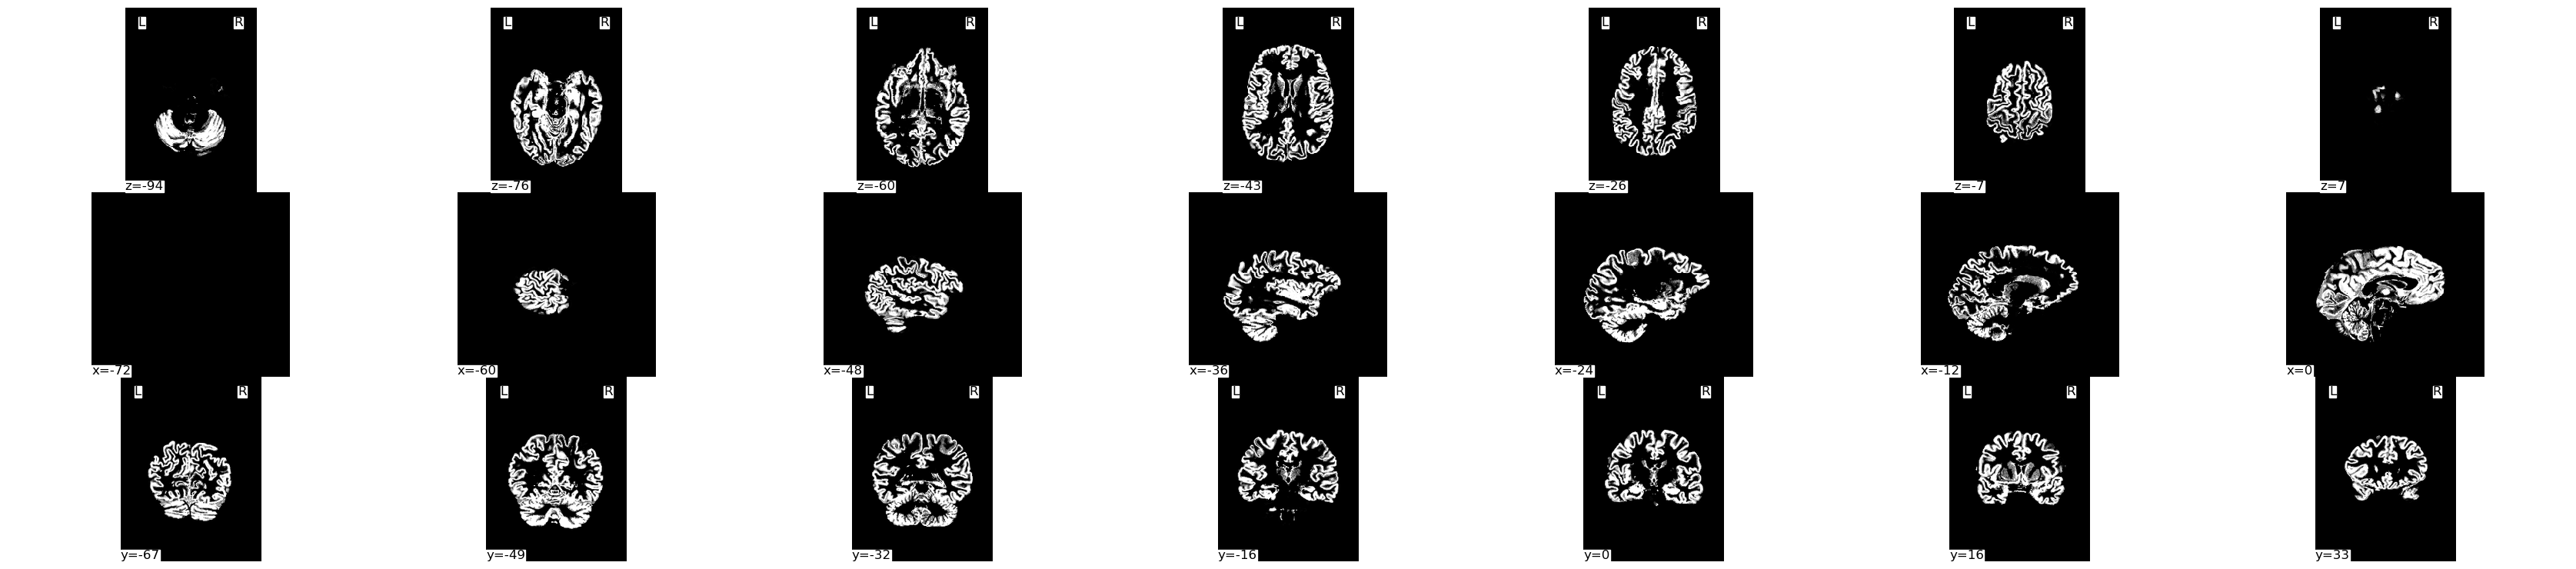


 -------------------------------------------------
10   T1/T1_fast/T1_brain_pve_2.nii.gz


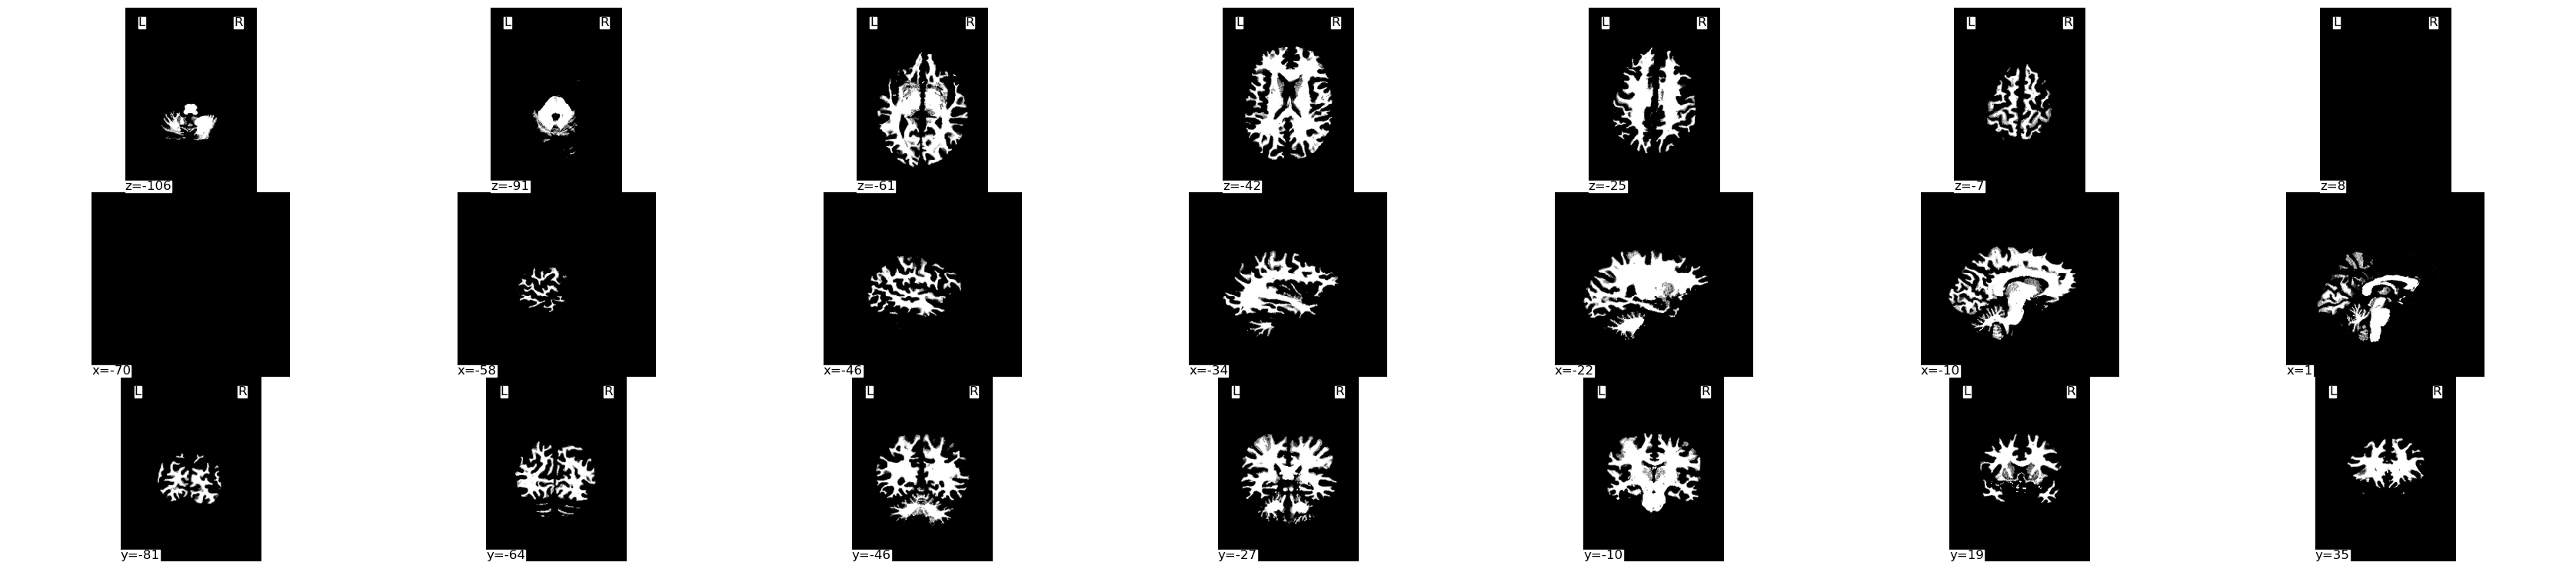


 -------------------------------------------------
11   T1/T1_fast/T1_brain_bias.nii.gz


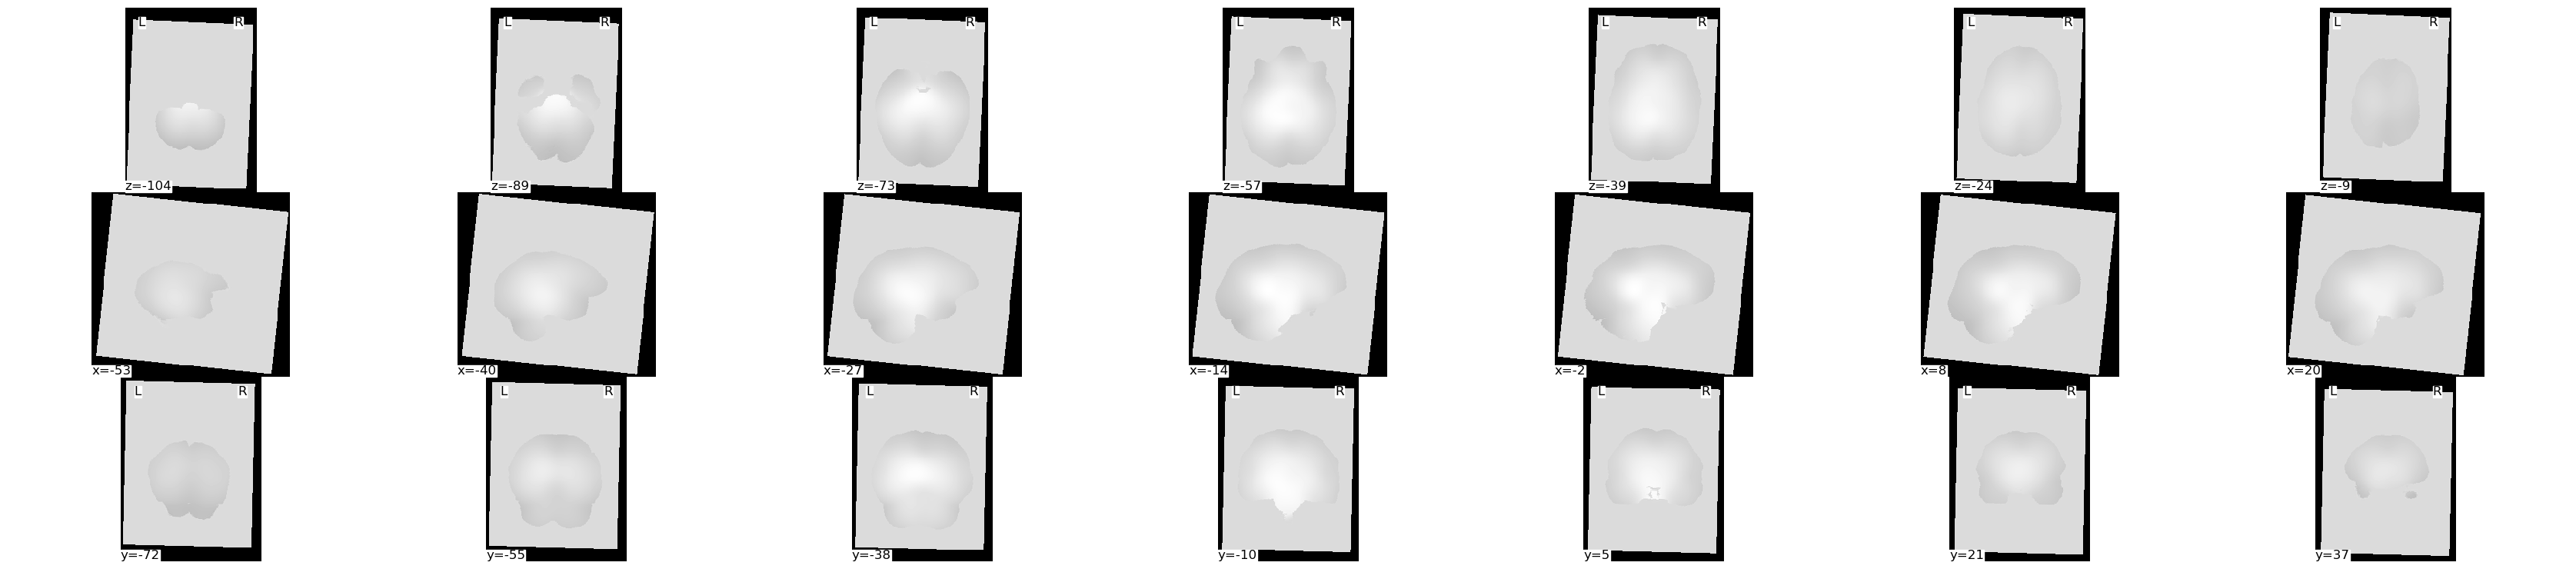


 -------------------------------------------------
12   T1/T1_first/T1_first_all_fast_firstseg.nii.gz


D:\miniconda3\envs\ConGele\lib\site-packages\nilearn\image\resampling.py:597: UserWarning: Casting data from int32 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")


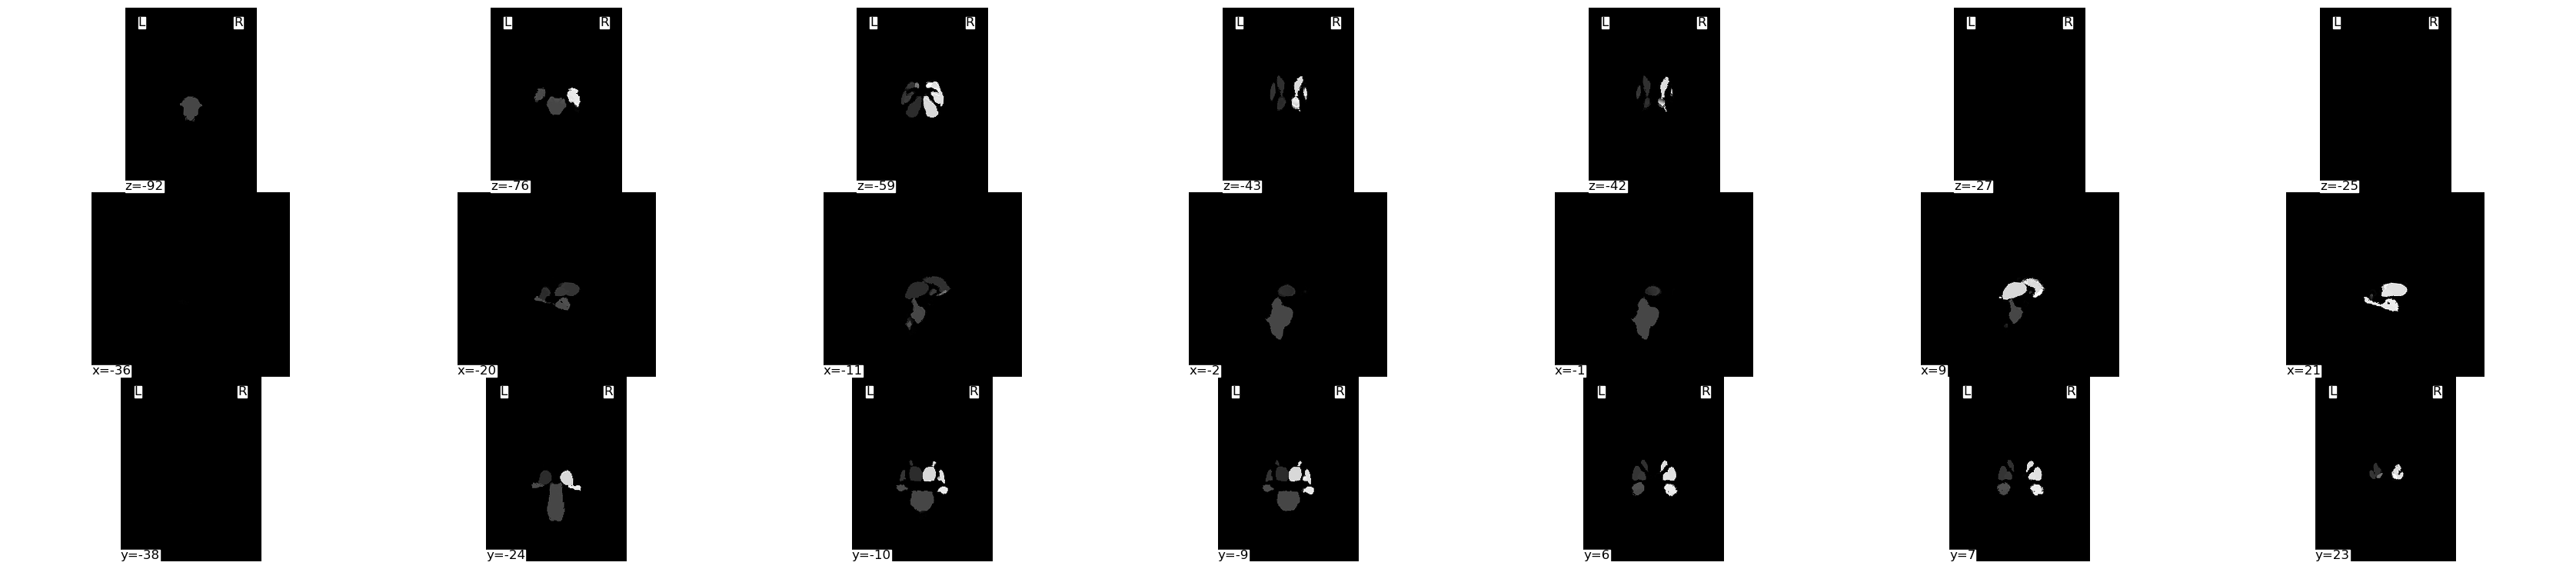

In [49]:
for idx, file in enumerate(nii_files):
    path = os.path.join(extract_dir, file)
    print("\n -------------------------------------------------")
    print(idx, " ", file)
    try:
        plot_nii(path)
    except Exception as e:
        print("Error: " + str(e))

## **!! should use T1/T1_brain_to_MNI.nii.gz**

In [ ]:
sample_id = [3303915, 3111573, 2688028]

In [13]:
src_dir = r"Z:\data\ukb\imaging\raw\t1_structural_nifti_20252"

for ID in sample_id:
    zipped_path = os.path.join(src_dir, f"{ID}_20252_2_0.zip")
    
    with zipfile.ZipFile(zipped_path, 'r') as archive:
        for scan in archive.namelist():
            if scan == "T1/T1_brain_to_MNI.nii.gz":
 
                extract_dir = os.path.join("./temp/data/", str(ID))
                os.makedirs(extract_dir, exist_ok=True)
                
                archive.extract(member=scan, path=extract_dir)

In [26]:
img_arr_list = []

for ID in sample_id:
    # the data extracted above
    # nii_path = os.path.join("./temp/data/", str(ID), "T1/T1_brain_to_MNI.nii.gz")
    # some other data
    nii_path = os.path.join("./data/T1_MNI_20252_2_0/mdd", str(ID), "T1/T1_brain_to_MNI.nii.gz")
    img = nib.load(nii_path)
    img_arr = img.get_fdata()
    img_arr_list.append(img_arr)
    
print(len(img_arr_list))


3


In [28]:
print((img_arr_list[0]==img_arr_list[1]).all())

False


In [22]:
import sys
SFCN_path = "../UKBiobank_deep_pretrain-master"
sys.path.append(SFCN_path)
from dp_model import dp_utils as dpu

In [29]:
img_arr_prep_list = []

for img_arr in img_arr_list:
    img_arr_prep_0 = img_arr/img_arr.mean()
    img_arr_prep = dpu.crop_center(img_arr_prep_0, (160, 192, 160))
    img_arr_prep_list.append(img_arr_prep)
    
print(len(img_arr_prep_list))

3


In [30]:
print((img_arr_prep_list[2]==img_arr_prep_list[0]).all())

False


---

---

# ==========

In [3]:
import pyreadr
import pandas as pd
import os

# Find age at the assessment 

* For the folder `data\ukb\imaging\raw\t1_structural_nifti_20252`, Some intro about [data field 20252](https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=20252)

* Using the age at assessment ([f.21003.2.0](https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=21003)) - third instance (out of 0-3) as this is when the initial imaging assessments were conducted.

## Find the .rds file storing the age info

* navigate to the most recent upload of UKBB **phenotypic** data via your command line, `GenScotDepression/data/ukb/phenotypes/fields/2021-04-phenotypes-ukb44797`
    * actually I think the newset one should be `2022-11-phenotypes-ukb670429`, but not sure how to open the [ukb670429](file:///Z:/data/ukb/phenotypes/fields/2022-11-phenotypes-ukb670429/ukb670429.html).<u>duckdb</u> file (16G).

* run the `find *.html | grep -Rl "id=21003"` command, it should return [<u>Recruitment.html</u>](file:///Z:/data/ukb/phenotypes/fields/2021-04-phenotypes-ukb44797/Recruitment.html) which would indicate that f.2100.3.0 can be found in Recruitment.<u>RDS</u>.

In [10]:
rds_path = r"Z:\data\ukb\phenotypes\fields\2021-04-phenotypes-ukb44797\Recruitment.rds"

# read in the rds file
result = pyreadr.read_r(rds_path)

In [11]:
print(result.keys()) # let's check what objects we got: there is only None
result_df = result[None] # extract the pandas data frame for the only object available

odict_keys([None])


In [12]:
# take a look at the data
result_df

f.eid    f.53.0.0    f.53.1.0    f.53.2.0 f.53.3.0 f.54.0.0  \
0       1000014  2009-08-13        None        None     None    11013   
1       1000027  2008-11-20        None        None     None    11007   
2       1000038  2009-07-24        None        None     None    11016   
3       1000043  2008-05-31        None        None     None    11007   
4       1000052  2008-03-06        None  2018-08-12     None    11009   
...         ...         ...         ...         ...      ...      ...   
502487  6026631  2008-03-19  2013-04-18        None     None    11008   
502488  6026644  2008-03-19        None        None     None    11008   
502489  6026655  2008-03-18        None        None     None    11008   
502490  6026669  2008-03-17        None        None     None    11008   
502491  6026676        None        None        None     None      NaN   

       f.54.1.0 f.54.2.0 f.54.3.0  f.55.0.0  ... f.20074.1.0 f.20074.2.0  \
0           NaN      NaN      NaN    August  ...         NaN         NaN   
1           NaN      NaN      NaN  November  ...         NaN         NaN   
2           NaN      NaN      NaN      July  ...         NaN         NaN   
3           NaN      NaN      NaN       May  ...         NaN         NaN   
4           NaN    11027      NaN     March  ...         NaN         NaN   
...         ...      ...      ...       ...  ...         ...         ...   
502487    11024      NaN      NaN     March  ...      387000         NaN   
502488      NaN      NaN      NaN     March  ...         NaN         NaN   
502489      NaN      NaN      NaN     March  ...         NaN         NaN   
502490      NaN      NaN      NaN     March  ...         NaN         NaN   
502491      NaN      NaN      NaN       NaN  ...         NaN         NaN   

       f.20075.0.0 f.20075.1.0 f.20075.2.0  \
0           353000         NaN         NaN   
1           167000         NaN         NaN   
2           392000         NaN         NaN   
3           173000         NaN         NaN   
4           565000         NaN         NaN   
...            ...         ...         ...   
502487      405000      405000         NaN   
502488      417000         NaN         NaN   
502489      407000         NaN         NaN   
502490      415000         NaN         NaN   
502491         NaN         NaN         NaN   

                                f.20118.0.0 f.21003.0.0 f.21003.1.0  \
0       England/Wales - Urban - less sparse          57         NaN   
1       England/Wales - Urban - less sparse          65         NaN   
2       England/Wales - Urban - less sparse          44         NaN   
3       England/Wales - Urban - less sparse          48         NaN   
4       England/Wales - Urban - less sparse          66         NaN   
...                                     ...         ...         ...   
502487  England/Wales - Urban - less sparse          48          53   
502488  England/Wales - Urban - less sparse          61         NaN   
502489  England/Wales - Urban - less sparse          61         NaN   
502490  England/Wales - Urban - less sparse          61         NaN   
502491                                  NaN         NaN         NaN   

       f.21003.2.0 f.21003.3.0  
0              NaN         NaN  
1              NaN         NaN  
2              NaN         NaN  
3              NaN         NaN  
4               77         NaN  
...            ...         ...  
502487         NaN         NaN  
502488         NaN         NaN  
502489         NaN         NaN  
502490         NaN         NaN  
502491         NaN         NaN  

[502492 rows x 24 columns]

In [13]:
# print all column names
result_df.columns

Index(['f.eid', 'f.53.0.0', 'f.53.1.0', 'f.53.2.0', 'f.53.3.0', 'f.54.0.0',
       'f.54.1.0', 'f.54.2.0', 'f.54.3.0', 'f.55.0.0', 'f.55.1.0', 'f.55.2.0',
       'f.55.3.0', 'f.20074.0.0', 'f.20074.1.0', 'f.20074.2.0', 'f.20075.0.0',
       'f.20075.1.0', 'f.20075.2.0', 'f.20118.0.0', 'f.21003.0.0',
       'f.21003.1.0', 'f.21003.2.0', 'f.21003.3.0'],
      dtype='object')

In [14]:
# we need subject_id and age_at_the_imaging_visit
age_all_df = result_df[['f.eid', 'f.21003.2.0']]
age_all_df

f.eid f.21003.2.0
0       1000014         NaN
1       1000027         NaN
2       1000038         NaN
3       1000043         NaN
4       1000052          77
...         ...         ...
502487  6026631         NaN
502488  6026644         NaN
502489  6026655         NaN
502490  6026669         NaN
502491  6026676         NaN

[502492 rows x 2 columns]

In [15]:
# drop NaN
age_df = age_all_df.dropna()
age_df["f.21003.2.0"] = age_df["f.21003.2.0"].astype(int)

print(age_df.dtypes)
age_df

f.eid          int32
f.21003.2.0    int32
dtype: object


C:\Users\Pc\AppData\Local\Temp\ipykernel_1972\3237691872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df["f.21003.2.0"] = age_df["f.21003.2.0"].astype(int)


f.eid  f.21003.2.0
4       1000052           77
6       1000079           57
13      1000145           61
38      1000393           56
72      1000732           70
...         ...          ...
502440  6026166           66
502445  6026219           67
502464  6026401           68
502466  6026423           71
502472  6026484           61

[49001 rows x 2 columns]

## Find all subject ID of scans

In [16]:
raw_dir = r"Z:\data\ukb\imaging\raw\t1_structural_nifti_20252"

ID_list = [f.split("_")[0] for f in os.listdir(raw_dir) if f.endswith(".zip")]
print(len(ID_list))

40681


In [17]:
ID_df = pd.DataFrame(ID_list, columns=["f.eid"])
ID_df = ID_df.astype(int)

print(ID_df.dtypes)
ID_df

f.eid    int32
dtype: object


f.eid
0      5024977
1      5106008
2      3165242
3      5932644
4      4197107
...        ...
40676  4059895
40677  5593735
40678  2970458
40679  3787250
40680  3845544

[40681 rows x 1 columns]

## Merge age and ID

In [18]:
ID_age_df = ID_df.merge(age_df, on='f.eid', how='left')

# check NaN, isna() or isnull() both works
print(f" Num of null age: {ID_age_df['f.21003.2.0'].isnull().sum()}")
print(ID_age_df[ID_age_df.isna().any(axis=1)])

ID_age_df

 Num of null age: 1
         f.eid  f.21003.2.0
29709  4264064          NaN


f.eid  f.21003.2.0
0      5024977         65.0
1      5106008         52.0
2      3165242         68.0
3      5932644         68.0
4      4197107         66.0
...        ...          ...
40676  4059895         61.0
40677  5593735         63.0
40678  2970458         65.0
40679  3787250         60.0
40680  3845544         54.0

[40681 rows x 2 columns]

In [20]:
# subject 4264064 not in the .rds file
age_all_df[age_all_df["f.eid"]==4264064]

Empty DataFrame
Columns: [f.eid, f.21003.2.0]
Index: []

In [54]:
#ID_age_df.to_pickle("./temp/ID_age_df.pkl")
ID_age_df = pd.read_pickle("./temp/ID_age_df.pkl")
ID_age_df

# Find Depression Subjects

* For the folder `data\ukb\imaging\raw\t1_structural_nifti_20252`
* Using [Data-Field 20126](https://biobank.ctsu.ox.ac.uk/crystal/field.cgi?id=20126): Bipolar and major depression status
    * ?? Defined-instances run from 0 to 0, labelled using **Instancing 2**.

## Find the .rds file storing depression info

* Still navigate to `GenScotDepression/data/ukb/phenotypes/fields/2021-04-phenotypes-ukb44797`
* Run command `run the find *.html | grep -Rl "id=20126"`
* Should be in `Touchscreen.rds`

In [55]:
mdd_rds_path = r"Z:\data\ukb\phenotypes\fields\2021-04-phenotypes-ukb44797\Touchscreen.rds"

The .rds file is too large to be loaded in using python. We load it by [R language](R_mdd.ipynb): select "f.eid" and "f.20126.0.0" columns, save them to the `./temp/ID_mdd_raw.csv` file.

In [21]:
mdd_all_df = pd.read_csv("./temp/ID_mdd_raw.csv")
mdd_all_df

f.eid               f.20126.0.0
0       1000014  No Bipolar or Depression
1       1000027                       NaN
2       1000038                       NaN
3       1000043                       NaN
4       1000052                       NaN
...         ...                       ...
502487  6026631                       NaN
502488  6026644                       NaN
502489  6026655                       NaN
502490  6026669                       NaN
502491  6026676                       NaN

[502492 rows x 2 columns]

In [67]:
# drop NaN
mdd_df = mdd_all_df.dropna()

print(mdd_df.dtypes)

print(mdd_df["f.20126.0.0"].unique())
print(mdd_df.value_counts("f.20126.0.0"))

mdd_df

f.eid           int64
f.20126.0.0    object
dtype: object
['No Bipolar or Depression'
 'Probable Recurrent major depression (moderate)'
 'Probable Recurrent major depression (severe)'
 'Single Probable major depression episode' 'Bipolar I Disorder'
 'Bipolar II Disorder']
f.20126.0.0
No Bipolar or Depression                          89521
Probable Recurrent major depression (moderate)    15010
Probable Recurrent major depression (severe)       8901
Single Probable major depression episode           7925
Bipolar I Disorder                                  808
Bipolar II Disorder                                 807
dtype: int64


f.eid                                     f.20126.0.0
0       1000014                        No Bipolar or Depression
6       1000079                        No Bipolar or Depression
7       1000085  Probable Recurrent major depression (moderate)
11      1000124                        No Bipolar or Depression
17      1000183  Probable Recurrent major depression (moderate)
...         ...                                             ...
502459  6026358                        No Bipolar or Depression
502463  6026395        Single Probable major depression episode
502465  6026410                        No Bipolar or Depression
502467  6026437                        No Bipolar or Depression
502475  6026515                        No Bipolar or Depression

[122972 rows x 2 columns]

## Map depression type to integer

The mapping follows [Data-Coding 100695](https://biobank.ctsu.ox.ac.uk/crystal/coding.cgi?id=100695)

In [65]:
mapping = {"No Bipolar or Depression": 0,
           "Bipolar I Disorder": 1,
           "Bipolar II Disorder": 2,
           "Probable Recurrent major depression (severe)": 3,
           "Probable Recurrent major depression (moderate)": 4,
           "Single Probable major depression episode": 5}

mdd_int_df = mdd_df.replace({"f.20126.0.0": mapping})
mdd_int_df

f.eid  f.20126.0.0
0       1000014            0
6       1000079            0
7       1000085            4
11      1000124            0
17      1000183            4
...         ...          ...
502459  6026358            0
502463  6026395            5
502465  6026410            0
502467  6026437            0
502475  6026515            0

[122972 rows x 2 columns]

## Merge depression type with ID (+ age)

In [23]:
# check wether ID in ID_age_df is all in ID_age_mdd_df: yes
set(ID_age_df['f.eid']).difference(set(ID_age_mdd_df['f.eid']))

set()

In [83]:
ID_age_mdd_df = ID_age_df.merge(mdd_int_df, on='f.eid', how='left')

# check NaN
print(f" Num of null mdd: {ID_age_mdd_df['f.20126.0.0'].isnull().sum()}")
# count mdd type
print(ID_age_mdd_df["f.20126.0.0"].value_counts(dropna=False).sort_index())

ID_age_mdd_df

 Num of null mdd: 30571
0.0     7349
1.0       51
2.0       50
3.0      645
4.0     1308
5.0      707
NaN    30571
Name: f.20126.0.0, dtype: int64


f.eid  f.21003.2.0  f.20126.0.0
0      5024977         65.0          NaN
1      5106008         52.0          NaN
2      3165242         68.0          NaN
3      5932644         68.0          NaN
4      4197107         66.0          NaN
...        ...          ...          ...
40676  4059895         61.0          NaN
40677  5593735         63.0          NaN
40678  2970458         65.0          NaN
40679  3787250         60.0          NaN
40680  3845544         54.0          NaN

[40681 rows x 3 columns]

In [2]:
# save data
#ID_age_mdd_df.to_pickle("./temp/ID_age_mdd_df.pkl")
ID_age_mdd_df = pd.read_pickle("./temp/ID_age_mdd_df.pkl")
#ID_age_mdd_df

# Find diabetic subjects

* [Data-Field 2976](https://biobank.ctsu.ox.ac.uk/crystal/field.cgi?id=2976): Age diabetes diagnosed, choose the third instence (2976.2.0)
* Still in `Z:\data\ukb\phenotypes\fields\2021-04-phenotypes-ukb44797\Touchscreen.rds`

## Load in diabetic info

* Use R to extract needed columns and save to `./temp/ID_mdd_diabetes_raw.csv`

In [88]:
diabetes_all_df = pd.read_csv("./temp/ID_mdd_diabetes_raw.csv")[["f.eid", "f.2976.2.0"]]
diabetes_all_df 

f.eid  f.2976.2.0
0       1000014         NaN
1       1000027         NaN
2       1000038         NaN
3       1000043         NaN
4       1000052         NaN
...         ...         ...
502487  6026631         NaN
502488  6026644         NaN
502489  6026655         NaN
502490  6026669         NaN
502491  6026676         NaN

[502492 rows x 2 columns]

?? assume NaN to be **not diabetic**?

In [91]:
# drop NaN
diabetes_df = diabetes_all_df.dropna()

print(diabetes_df.dtypes)
diabetes_df

f.eid           int64
f.2976.2.0    float64
dtype: object


f.eid  f.2976.2.0
340     1003419        60.0
720     1007216        55.0
1421    1014225        54.0
1530    1015314        61.0
1915    1019167        66.0
...         ...         ...
501126  6013021        58.0
501127  6013036        39.0
501705  6018810        78.0
502066  6022427         7.0
502383  6025595        72.0

[2637 rows x 2 columns]

## Merge diabetes with ID

In [93]:
ID_age_mdd_diabetes_df = ID_age_mdd_df.merge(diabetes_df, on='f.eid', how='left')

# check NaN
print(f"Num of null diabetes: {ID_age_mdd_diabetes_df['f.2976.2.0'].isnull().sum()}")

ID_age_mdd_diabetes_df

Num of null diabetes: 38616


f.eid  f.21003.2.0  f.20126.0.0  f.2976.2.0
0      5024977         65.0          NaN         NaN
1      5106008         52.0          NaN         NaN
2      3165242         68.0          NaN         NaN
3      5932644         68.0          NaN        50.0
4      4197107         66.0          NaN         NaN
...        ...          ...          ...         ...
40676  4059895         61.0          NaN         NaN
40677  5593735         63.0          NaN         NaN
40678  2970458         65.0          NaN         NaN
40679  3787250         60.0          NaN         NaN
40680  3845544         54.0          NaN         NaN

[40681 rows x 4 columns]

In [37]:
# save data
#ID_age_mdd_diabetes_df.to_pickle("./temp/ID_age_mdd_diabetes_df.pkl")
ID_age_mdd_diabetes_df = pd.read_pickle("./temp/ID_age_mdd_diabetes_df.pkl")
#ID_age_mdd_diabetes_df

* According to [Data-Coding 100291](https://biobank.ctsu.ox.ac.uk/crystal/coding.cgi?id=100291):
    * -1: Do not know
    * -3：Prefer not to answer

In [101]:
ID_age_mdd_diabetes_df[ID_age_mdd_diabetes_df["f.2976.2.0"]<0].value_counts("f.2976.2.0")

f.2976.2.0
-1.0    60
-3.0     1
dtype: int64

---

# Brief Analysis

Now we have a table that stores subjects ID, Age at the assessment, Depression type and Age of diabetes being diagnosed. Lets turn it into `./temp/Data_info.csv`:

In [7]:
ID_age_mdd_diabetes_df.to_csv("./temp/Data_info.csv", index=False)

## Column Meaning

* The table has `40681` rows -- same as the number of subjects in the `/data/ukb/imaging/raw/t1_structural_nifti_20252` foler -- the one [stores the T1 brain scans we need.](https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=20252)

* Each row stores information of one unique subjects: 
    * `f.eid`: subjects ID, 
    * `f.21003.2.0`: [Age when attended assessment centre (3rd instance)](https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=21003), 
    * `f.20126.0.0`: [Bipolar and major depression status](https://biobank.ctsu.ox.ac.uk/crystal/field.cgi?id=20126), 
        * The value of this column are integers rangeing from \[0,5\]. Its meaning follows [Data-Coding 100695](https://biobank.ctsu.ox.ac.uk/crystal/coding.cgi?id=100695).
        * Actually I'm not sure whether this column fits our data. We need information on instance 2 (e.g. f.20126.2.0), but the webpage says "Defined-instances run from 0 to 0, labelled using Instancing 2" (?? gonna ask Hannah about this). 
    * `f.2976.2.0`: [Age diabetes diagnosed](https://biobank.ctsu.ox.ac.uk/crystal/field.cgi?id=2976).
        * The value should be positive integers. The meaning of negtive ones follows [Data-Coding 100291](https://biobank.ctsu.ox.ac.uk/crystal/coding.cgi?id=100291).
    

## Source of values
* The values of first column (ID) are extracted from the file names in the `t1_structural_nifti_20252` folder. 
* The values of other three columns are from (left join with ID) `/data/ukb/phenotypes/fields/2021-04-phenotypes-ukb44797` folder: 
    * `Age of assessment` in `Recruitment.rds` file, 
    * `Depression status` and `Age diabetes diagnosed` info are in `Touchscreen.rds` file.

## Value Statistics
* One `NaN` in `age of assessment` column. Subject ID `4264064` is not recorded in the `Recruitment.rds` file.

* `Depression status` column:
    * value: count
        ```
        * 0.0:     7349      No Bipolar or Depression
        * 1.0:       51      Bipolar I Disorder
        * 2.0:       50      Bipolar II Disorder
        * 3.0:      645      Probable Recurrent major depression (severe)
        * 4.0:     1308      Probable Recurrent major depression (moderate)
        * 5.0:      707      Single Probable major depression episode     
        * NaN:    30571      In `Touchscreen.rds` but no value.
        ```
    * All subjects ID are recorded in the `Touchscreen.rds` file.
    * For depression, prehaps only index \[0,3,4,5\] matters (?).
        * 3305 depressed subjects in total.
        * Do we need to first use the most severe depression type?
    * 0 means not have depression, but for NaN values we have no idea about the subjects' depression status.

* `Age diabetes diagnosed` column:
    * value: count
        ```
        * NaN:    38616
        * Other:  
            * \>0:    2004 
            * -1:     60
            * -3:     1
        ```
    * All subjects ID are recorded in the `Touchscreen.rds` file.
    * Here a not-NaN-value means the subject has diabetes.
        * 2065 diabetic subjects in toal.
        * Can we also level the severity of diabetes according to the length of time the subjects has diabetes?
    * However can we assume subjects with NaN value do not have diabetes??

* Some other questions:
    * How do we define HC population? If it's `(depression status==0) & (NaN for diabetes)` then we have 6989 subjects in total.
    * For now we also have:
        * 144 subjects with both diabetes and depression
        * 360 subjects with only diabetes
        * 2516 subjects with only depression
        * I think we probably need more samples (?).
    * For now I can first try to predict the brain age on the HC population to see wether we need to re-train the SFCN model. Do we now have some server to do this?

## Mark disease type

`mdd`, `diabetes`, `mdd_diabetes`, `HC`

In [27]:
ID_age_mdd_diabetes_df.dtypes

f.eid            int32
f.21003.2.0    float64
f.20126.0.0    float64
f.2976.2.0     float64
dtype: object

In [38]:
ID_age_mdd_diabetes_df["status"]=None

In [39]:
# missing age at assessment
ID_age_mdd_diabetes_df[ID_age_mdd_diabetes_df["f.21003.2.0"].isna()]

f.eid  f.21003.2.0  f.20126.0.0  f.2976.2.0 status
29709  4264064          NaN          NaN         NaN   None

In [53]:
# for all not NaN subjects: age diabetes diagnosed <= age of assessment
ID_age_mdd_diabetes_df[ID_age_mdd_diabetes_df["f.2976.2.0"]>ID_age_mdd_diabetes_df["f.eid"]]

Empty DataFrame
Columns: [f.eid, f.21003.2.0, f.20126.0.0, f.2976.2.0, status]
Index: []

### only depression

In [50]:
# subjects with only depression
only_mdd = ((ID_age_mdd_diabetes_df["f.20126.0.0"].isin([3.0, 4.0, 5.0])) & (ID_age_mdd_diabetes_df["f.2976.2.0"].isna()))
ID_age_mdd_diabetes_df.loc[only_mdd, ["status"]] = "mdd"

ID_age_mdd_diabetes_df[(ID_age_mdd_diabetes_df["f.2976.2.0"].isna()) & (ID_age_mdd_diabetes_df["f.20126.0.0"].isin([3.0, 4.0, 5.0]))]

f.eid  f.21003.2.0  f.20126.0.0  f.2976.2.0 status
13     3303915         72.0          5.0         NaN    mdd
19     3111573         69.0          4.0         NaN    mdd
23     2688028         60.0          4.0         NaN    mdd
57     2330198         63.0          5.0         NaN    mdd
96     1244402         77.0          4.0         NaN    mdd
...        ...          ...          ...         ...    ...
40619  5743070         77.0          3.0         NaN    mdd
40627  4966663         70.0          3.0         NaN    mdd
40631  4947696         60.0          4.0         NaN    mdd
40639  1067119         55.0          5.0         NaN    mdd
40667  2238608         59.0          5.0         NaN    mdd

[2516 rows x 5 columns]

### only diabetes

In [49]:
# subjects with only diabetes
only_diabetes = (ID_age_mdd_diabetes_df["f.20126.0.0"]==0.0) & (ID_age_mdd_diabetes_df["f.2976.2.0"].notna())
ID_age_mdd_diabetes_df.loc[only_diabetes, ["status"]] = "diabetes"

ID_age_mdd_diabetes_df[(ID_age_mdd_diabetes_df["f.2976.2.0"].notna()) & (ID_age_mdd_diabetes_df["f.20126.0.0"]==0.0)]

f.eid  f.21003.2.0  f.20126.0.0  f.2976.2.0    status
549    4602385         65.0          0.0        60.0  diabetes
573    4475920         67.0          0.0        66.0  diabetes
649    2952139         77.0          0.0        50.0  diabetes
731    1109938         76.0          0.0        65.0  diabetes
813    5281148         62.0          0.0        36.0  diabetes
...        ...          ...          ...         ...       ...
40415  2880912         74.0          0.0        68.0  diabetes
40456  2154633         74.0          0.0        60.0  diabetes
40478  1883860         57.0          0.0        -1.0  diabetes
40607  5066389         72.0          0.0        61.0  diabetes
40632  4953508         71.0          0.0        58.0  diabetes

[360 rows x 5 columns]

### both depression and diabetes

In [47]:
# both diabetes and depression
mdd_diabetes = (ID_age_mdd_diabetes_df["f.20126.0.0"].isin([3.0, 4.0, 5.0])) & (ID_age_mdd_diabetes_df["f.2976.2.0"].notna())
ID_age_mdd_diabetes_df.loc[mdd_diabetes, ["status"]] = "mdd_diabetes"

ID_age_mdd_diabetes_df[(ID_age_mdd_diabetes_df["f.2976.2.0"].notna()) & (ID_age_mdd_diabetes_df["f.20126.0.0"].isin([3.0, 4.0, 5.0]))]

f.eid  f.21003.2.0  f.20126.0.0  f.2976.2.0        status
265    3949993         59.0          3.0        54.0  mdd_diabetes
285    5797611         67.0          5.0        59.0  mdd_diabetes
518    1179592         66.0          4.0        47.0  mdd_diabetes
791    3876054         58.0          3.0        56.0  mdd_diabetes
808    2575270         61.0          4.0        61.0  mdd_diabetes
...        ...          ...          ...         ...           ...
39508  2200834         77.0          5.0        53.0  mdd_diabetes
39603  1577126         71.0          5.0        71.0  mdd_diabetes
39679  4519651         57.0          4.0        50.0  mdd_diabetes
39914  3741657         70.0          4.0        55.0  mdd_diabetes
40269  5555797         55.0          5.0        39.0  mdd_diabetes

[144 rows x 5 columns]

### Health Control

In [52]:
# no depression no bipolar no diabetes
HC = (ID_age_mdd_diabetes_df["f.20126.0.0"]==0.0) & (ID_age_mdd_diabetes_df["f.2976.2.0"].isnull())
ID_age_mdd_diabetes_df.loc[HC, ["status"]] = "HC"

ID_age_mdd_diabetes_df[(ID_age_mdd_diabetes_df["f.2976.2.0"].isnull()) & (ID_age_mdd_diabetes_df["f.20126.0.0"]==0.0)]

f.eid  f.21003.2.0  f.20126.0.0  f.2976.2.0 status
18     1198929         70.0          0.0         NaN     HC
20     3030287         60.0          0.0         NaN     HC
21     3055051         71.0          0.0         NaN     HC
26     2828573         59.0          0.0         NaN     HC
33     2507464         70.0          0.0         NaN     HC
...        ...          ...          ...         ...    ...
40657  4351668         58.0          0.0         NaN     HC
40658  4386787         53.0          0.0         NaN     HC
40662  4247063         66.0          0.0         NaN     HC
40665  5502651         59.0          0.0         NaN     HC
40670  4142266         73.0          0.0         NaN     HC

[6989 rows x 5 columns]

In [54]:
# save data
ID_age_mdd_diabetes_df.to_csv("./data/T1_MNI_20252_2_0.csv", index=False)

---

---

# ==========

In [1]:
import os, sys
import pandas as pd
import zipfile
from tqdm import tqdm

In [26]:
data_info_df = pd.read_csv("./data/T1_MNI_20252_2_0.csv")
print(data_info_df.dtypes)

data_info_df.head()

f.eid            int64
f.21003.2.0    float64
f.20126.0.0    float64
f.2976.2.0     float64
status          object
path            object
MNI               bool
dtype: object


f.eid  f.21003.2.0  f.20126.0.0  f.2976.2.0 status path   MNI
0  5024977         65.0          NaN         NaN    NaN  NaN  True
1  5106008         52.0          NaN         NaN    NaN  NaN  True
2  3165242         68.0          NaN         NaN    NaN  NaN  True
3  5932644         68.0          NaN        50.0    NaN  NaN  True
4  4197107         66.0          NaN         NaN    NaN  NaN  True

# Find subjects with no MNI file

In [16]:
src_dir = r"/afs/inf.ed.ac.uk/user/s24/s2442138/Documents/GenScotDepression/data/ukb/imaging/raw/t1_structural_nifti_20252"

count = 0 

for zip_file in tqdm(os.listdir(src_dir)):
#for zip_file in os.listdir(src_dir):
    # exclude other files
    if not zip_file.endswith(".zip"): 
        continue
    
    # zip file path of one subject
    zip_path = os.path.join(src_dir, zip_file)
    
    exist = False
    # open the zipped file of one subject
    with zipfile.ZipFile(zip_path, 'r') as archive:
        # run through all scans and extract the MNI one
        for scan in archive.namelist():
            if scan == "T1/T1_brain_to_MNI.nii.gz":
                exist = True
                break
    
    ID = zip_file.split("_")[0]
    data_info_df.loc[data_info_df["f.eid"]==int(ID), ["MNI"]] = exist

    if not exist: 
        count += 1

print(f"There're {count} subjects with no MNI file.")
data_info_df.to_csv("./data/T1_MNI_20252_2_0.csv", index=False)

100%|█████████████████████████████████████████████████████████████████████████████| 40684/40684 [29:03<00:00, 23.33it/s]

There're 1002 subjects with no MNI file.


In [25]:
print(data_info_df.dtypes)
data_info_df

f.eid            int64
f.21003.2.0    float64
f.20126.0.0    float64
f.2976.2.0     float64
status          object
path            object
MNI               bool
dtype: object


f.eid  f.21003.2.0  f.20126.0.0  f.2976.2.0 status path   MNI
0      5024977         65.0          NaN         NaN    NaN  NaN  True
1      5106008         52.0          NaN         NaN    NaN  NaN  True
2      3165242         68.0          NaN         NaN    NaN  NaN  True
3      5932644         68.0          NaN        50.0    NaN  NaN  True
4      4197107         66.0          NaN         NaN    NaN  NaN  True
...        ...          ...          ...         ...    ...  ...   ...
40676  4059895         61.0          NaN         NaN    NaN  NaN  True
40677  5593735         63.0          NaN         NaN    NaN  NaN  True
40678  2970458         65.0          NaN         NaN    NaN  NaN  True
40679  3787250         60.0          NaN         NaN    NaN  NaN  True
40680  3845544         54.0          NaN         NaN    NaN  NaN  True

[40681 rows x 7 columns]

In [21]:
data_info_df.to_csv("./data/T1_MNI_20252_2_0.csv", index=False)

In [24]:
data_info_df = pd.read_csv("./data/T1_MNI_20252_2_0.csv")

---
**mdd**: 2461 available subjects

**HC**: 6802 available subjects

In [26]:
data_info_df[(data_info_df["status"]=="mdd") & (data_info_df["MNI"]==True)]

f.eid  f.21003.2.0  f.20126.0.0  f.2976.2.0 status  \
13     3303915         72.0          5.0         NaN    mdd   
19     3111573         69.0          4.0         NaN    mdd   
23     2688028         60.0          4.0         NaN    mdd   
57     2330198         63.0          5.0         NaN    mdd   
96     1244402         77.0          4.0         NaN    mdd   
...        ...          ...          ...         ...    ...   
40619  5743070         77.0          3.0         NaN    mdd   
40627  4966663         70.0          3.0         NaN    mdd   
40631  4947696         60.0          4.0         NaN    mdd   
40639  1067119         55.0          5.0         NaN    mdd   
40667  2238608         59.0          5.0         NaN    mdd   

                                                    path   MNI  
13     ./data/T1_MNI_20252_2_0/3303915/T1/T1_brain_to...  True  
19     ./data/T1_MNI_20252_2_0/3111573/T1/T1_brain_to...  True  
23     ./data/T1_MNI_20252_2_0/2688028/T1/T1_brain_to...  True  
57     ./data/T1_MNI_20252_2_0/2330198/T1/T1_brain_to...  True  
96     ./data/T1_MNI_20252_2_0/1244402/T1/T1_brain_to...  True  
...                                                  ...   ...  
40619                                                NaN  True  
40627                                                NaN  True  
40631                                                NaN  True  
40639                                                NaN  True  
40667                                                NaN  True  

[2461 rows x 7 columns]

In [27]:
data_info_df[(data_info_df["status"]=="HC") & (data_info_df["MNI"]==True)]

f.eid  f.21003.2.0  f.20126.0.0  f.2976.2.0 status  \
18     1198929         70.0          0.0         NaN     HC   
20     3030287         60.0          0.0         NaN     HC   
21     3055051         71.0          0.0         NaN     HC   
26     2828573         59.0          0.0         NaN     HC   
33     2507464         70.0          0.0         NaN     HC   
...        ...          ...          ...         ...    ...   
40657  4351668         58.0          0.0         NaN     HC   
40658  4386787         53.0          0.0         NaN     HC   
40662  4247063         66.0          0.0         NaN     HC   
40665  5502651         59.0          0.0         NaN     HC   
40670  4142266         73.0          0.0         NaN     HC   

                                                    path   MNI  
18     ./data/T1_MNI_20252_2_0/1198929/T1/T1_brain_to...  True  
20     ./data/T1_MNI_20252_2_0/3030287/T1/T1_brain_to...  True  
21     ./data/T1_MNI_20252_2_0/3055051/T1/T1_brain_to...  True  
26     ./data/T1_MNI_20252_2_0/2828573/T1/T1_brain_to...  True  
33     ./data/T1_MNI_20252_2_0/2507464/T1/T1_brain_to...  True  
...                                                  ...   ...  
40657                                                NaN  True  
40658                                                NaN  True  
40662                                                NaN  True  
40665                                                NaN  True  
40670                                                NaN  True  

[6802 rows x 7 columns]

# Extract T1 MNI files -- HC + mdd

In [19]:
data_info_df["path"] = None

In [22]:
# source folder containing the scans of the many subjects
src_dir = r"/afs/inf.ed.ac.uk/user/s24/s2442138/Documents/GenScotDepression/data/ukb/imaging/raw/t1_structural_nifti_20252"
# target folder to store the extracted scans
tgt_dir = r"./data/T1_MNI_20252_2_0/"

HC_count, mdd_count = 0, 0
n_HC, n_mdd = 300, 100  # change to inf if don't need to worry about space

for zip_file in tqdm(os.listdir(src_dir)):
#for zip_file in os.listdir(src_dir):
    # exclude other files
    if not zip_file.endswith(".zip"): 
        continue
    
    ID = zip_file.split("_")[0]
    item = data_info_df[data_info_df["f.eid"]==int(ID)]
    
    # skip subjects with no MNI file
    if not item["MNI"].all():
        continue

    # to save space, only store subjects of HC and only_depression up to a specified count
    # skip if not any
    if not (item["status"].isin(["mdd", "HC"]).all()):
        continue
    elif (item["status"]=="HC").all():
        HC_count += 1
        if HC_count > n_HC:
            continue
        sub_tgt_dir = os.path.join(tgt_dir, "HC") # save HC images to one folder
    elif (item["status"]=="mdd").all():
        mdd_count += 1
        if mdd_count > n_mdd:
            continue
        sub_tgt_dir = os.path.join(tgt_dir, "mdd") # save mdd images to one folder
    # stop if enough data has been obtained
    if HC_count > n_HC and mdd_count > n_mdd:
        break
    
    # zip file path of one subject
    zip_path = os.path.join(src_dir, zip_file)
    # dir to store the MNI scan of one subject
    store_dir = os.path.join(sub_tgt_dir, ID)
    os.makedirs(store_dir, exist_ok=True)
    
    # open the zipped file of one subject
    with zipfile.ZipFile(zip_path, 'r') as archive:
        # run through all scans and extract the MNI one
        for scan in archive.namelist():
            if scan == "T1/T1_brain_to_MNI.nii.gz":
                # extract image
                archive.extract(member=scan, path=store_dir)
                # save storage path to data_info_df
                store_path = os.path.join(store_dir, scan)
                data_info_df.loc[data_info_df["f.eid"]==int(ID), ["path"]] = store_path
                break

data_info_df.to_csv("./data/T1_MNI_20252_2_0.csv", index=False)    

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40684/40684 [00:50<00:00, 808.47it/s]


In [25]:
data_info_df.to_csv("./data/T1_MNI_20252_2_0.csv", index=False)

In [23]:
data_info_df[(data_info_df["status"]=="HC") & (data_info_df["path"].notna())]

f.eid  f.21003.2.0  f.20126.0.0  f.2976.2.0 status  \
18    1198929         70.0          0.0         NaN     HC   
20    3030287         60.0          0.0         NaN     HC   
21    3055051         71.0          0.0         NaN     HC   
26    2828573         59.0          0.0         NaN     HC   
33    2507464         70.0          0.0         NaN     HC   
...       ...          ...          ...         ...    ...   
1946  2035535         53.0          0.0         NaN     HC   
1953  2288898         59.0          0.0         NaN     HC   
1954  3161207         68.0          0.0         NaN     HC   
1958  3279169         50.0          0.0         NaN     HC   
1966  2779329         60.0          0.0         NaN     HC   

                                                   path   MNI  
18    ./data/T1_MNI_20252_2_0/HC/1198929/T1/T1_brain...  True  
20    ./data/T1_MNI_20252_2_0/HC/3030287/T1/T1_brain...  True  
21    ./data/T1_MNI_20252_2_0/HC/3055051/T1/T1_brain...  True  
26    ./data/T1_MNI_20252_2_0/HC/2828573/T1/T1_brain...  True  
33    ./data/T1_MNI_20252_2_0/HC/2507464/T1/T1_brain...  True  
...                                                 ...   ...  
1946  ./data/T1_MNI_20252_2_0/HC/2035535/T1/T1_brain...  True  
1953  ./data/T1_MNI_20252_2_0/HC/2288898/T1/T1_brain...  True  
1954  ./data/T1_MNI_20252_2_0/HC/3161207/T1/T1_brain...  True  
1958  ./data/T1_MNI_20252_2_0/HC/3279169/T1/T1_brain...  True  
1966  ./data/T1_MNI_20252_2_0/HC/2779329/T1/T1_brain...  True  

[300 rows x 7 columns]

In [27]:
data_info_df[(data_info_df["status"]=="mdd") & (data_info_df["path"].notna())]

f.eid  f.21003.2.0  f.20126.0.0  f.2976.2.0 status  \
13    3303915         72.0          5.0         NaN    mdd   
19    3111573         69.0          4.0         NaN    mdd   
23    2688028         60.0          4.0         NaN    mdd   
57    2330198         63.0          5.0         NaN    mdd   
96    1244402         77.0          4.0         NaN    mdd   
...       ...          ...          ...         ...    ...   
1297  1242643         70.0          4.0         NaN    mdd   
1307  3200432         69.0          5.0         NaN    mdd   
1320  4208029         62.0          4.0         NaN    mdd   
1321  3870227         74.0          4.0         NaN    mdd   
1330  4219495         64.0          4.0         NaN    mdd   

                                                   path   MNI  
13    ./data/T1_MNI_20252_2_0/mdd/3303915/T1/T1_brai...  True  
19    ./data/T1_MNI_20252_2_0/mdd/3111573/T1/T1_brai...  True  
23    ./data/T1_MNI_20252_2_0/mdd/2688028/T1/T1_brai...  True  
57    ./data/T1_MNI_20252_2_0/mdd/2330198/T1/T1_brai...  True  
96    ./data/T1_MNI_20252_2_0/mdd/1244402/T1/T1_brai...  True  
...                                                 ...   ...  
1297  ./data/T1_MNI_20252_2_0/mdd/1242643/T1/T1_brai...  True  
1307  ./data/T1_MNI_20252_2_0/mdd/3200432/T1/T1_brai...  True  
1320  ./data/T1_MNI_20252_2_0/mdd/4208029/T1/T1_brai...  True  
1321  ./data/T1_MNI_20252_2_0/mdd/3870227/T1/T1_brai...  True  
1330  ./data/T1_MNI_20252_2_0/mdd/4219495/T1/T1_brai...  True  

[100 rows x 7 columns]